# **Project Name**    - Bike sharing demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual



# **Project Summary -**

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **GitHub Link -**

[link to Github]https://github.com/AbdulBasitBangi/Regression-Bike-Sharing-and-Demand-Prediction.git

# **Problem Statement**


The problem statement for this project is to develop a machine learning model that can accurately predict the number of rental bikes required at each hour in urban cities. This is crucial for ensuring a stable supply of rental bikes and minimizing waiting times for users. The project aims to address the challenge of making rental bikes available and accessible to the public at the right time by predicting the demand for rental bikes at different times of the day. The ultimate goal is to help cities optimize their bike-sharing systems by predicting demand and allocating resources accordingly.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [43]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
#setting font size throughout the notebook
plt.rcParams.update({'font.size': 14})

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# from pandas.core.groupby import groupby
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [44]:
# Load Dataset
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')


# reading data file
dir_path = '/content/drive/MyDrive/Colab Notebooks/Capstone/Bike Prediction/'
file_name = 'SeoulBikeData.csv'
data_file_path = dir_path + file_name
df = pd.read_csv(data_file_path, encoding = 'ISO-8859-1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [45]:
# Dataset First Look
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [46]:
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [47]:
# Dataset Rows & Columns count
x = df.shape
print(f'the dataset has {x[0]} rows and {x[1]} columns')

the dataset has 8760 rows and 14 columns


### Dataset Information

In [48]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

We see that Date, Season, Holiday and functoning day are of object type, so these need to be updated as suited for ML.

#### Duplicate Values

In [49]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(dup)

0


#### Missing Values/Null Values

In [50]:
# Missing Values/Null Values Count
missing_values = df.isna().sum()
print(missing_values)

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


<Axes: >

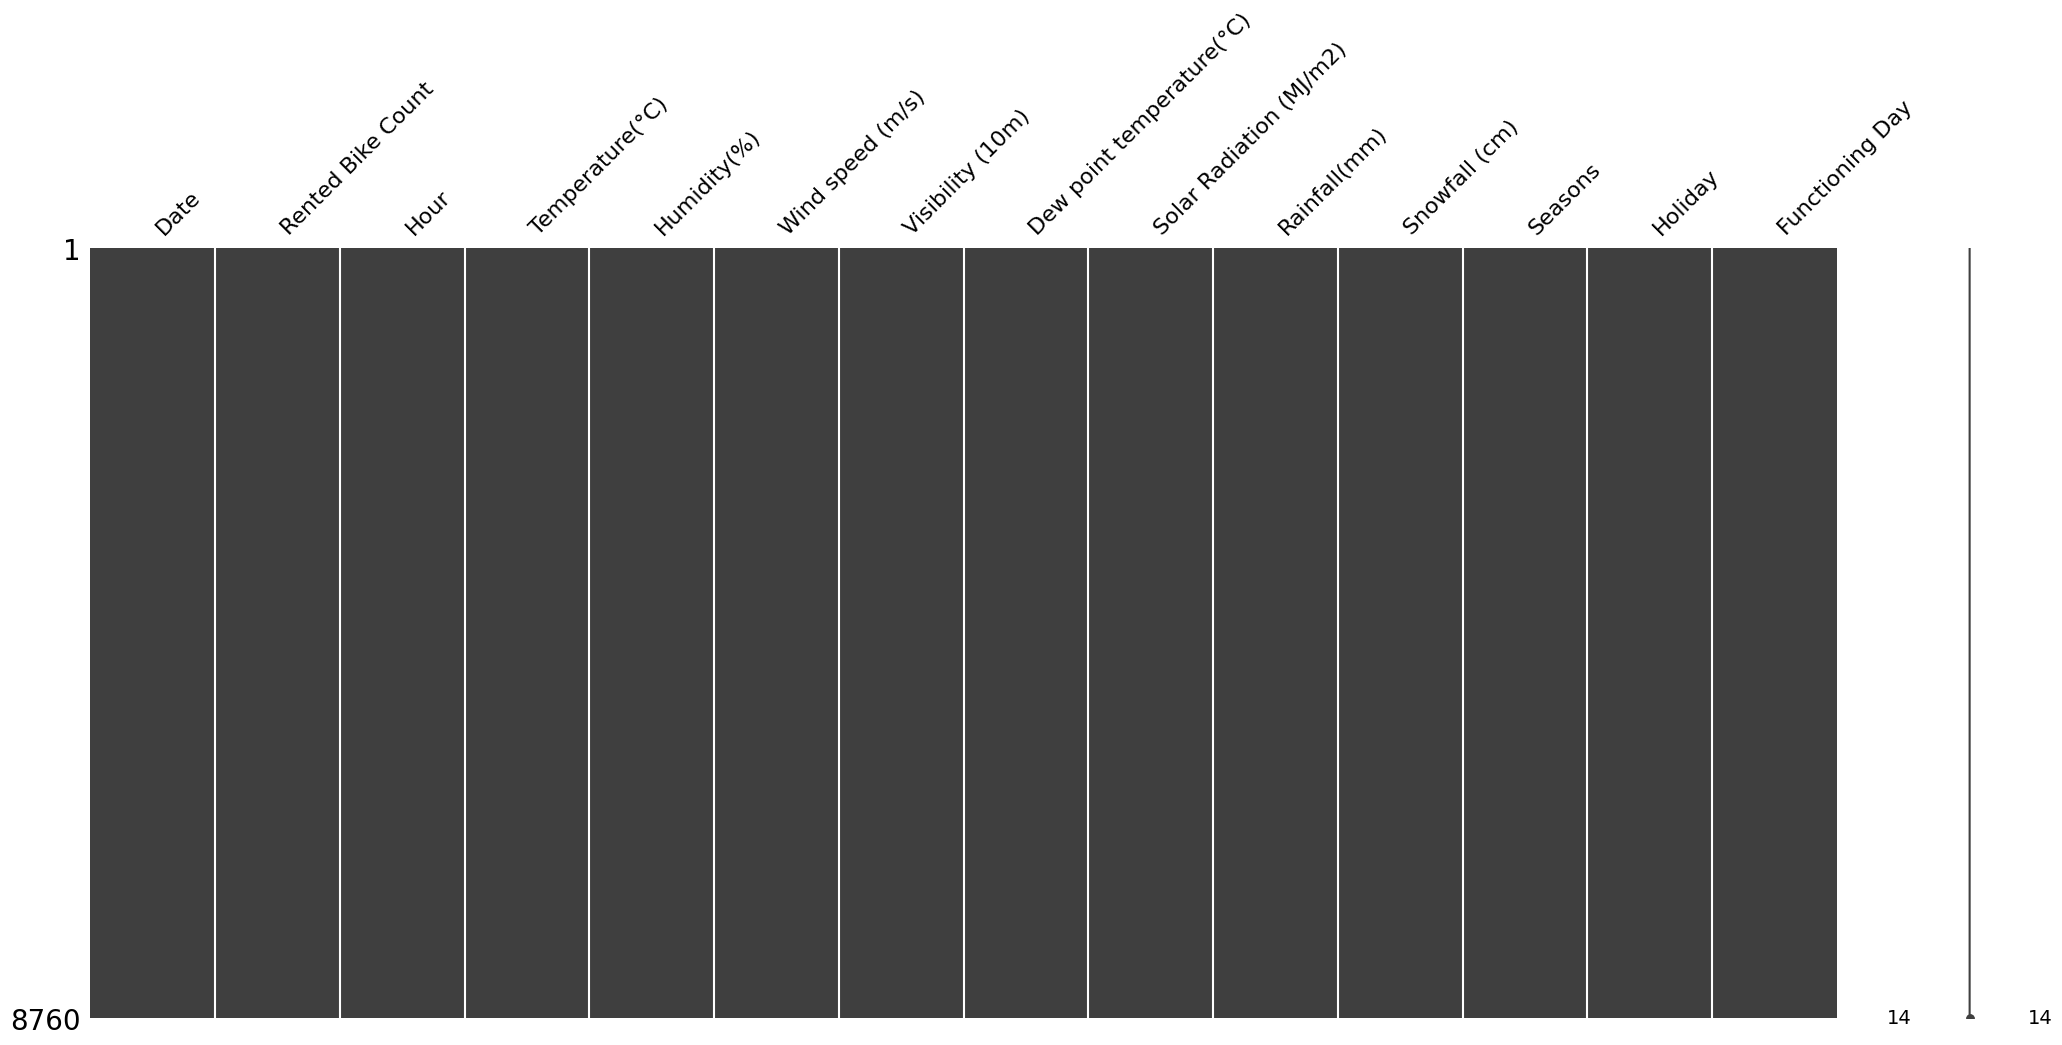

In [51]:
# Visualizing the missing values
msno.matrix(df)

### What did you know about your dataset?

**Columns Information:**

**Date** has information about date in format year-month-day

**Rented Bike count** information about Count of bikes rented at each hour

**Hour** - Hour of the day (0 to 23)

**Temperature** Temperature in Celsius

**Humidity** - humidity with respect to the given hour on the given date (in %)

**Windspeed** - Windspeed with respect to the given hour on the given date (in m/s)

**Visibility** - Visibility with respect to the given hour on the given date (upto 10m)

**Dew point temperature** - Dew point temperature with respect to the given hour on the given date (in Celsius)

**Solar radiation** - Solar Radition with respect to the given hour on the given date (in MJ/m2)

**Rainfall** - Rainfall with respect to the given hour on the given date (in mm)

**Snowfall** - Snowfall  with respect to the given hour on the given date (in cm)

**Seasons** - various seasons that is "Winter, Spring, Summer, Autumn"

**Holiday** - if it was holiday or not, namely "Holiday" and "No holiday"

**Functional Day** - shows if the hours were functional or not, No for Non Functional Hours and Yes for Functional hours

## ***2. Understanding Your Variables***

In [52]:
# Dataset Columns
col = df.columns
print(col)

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


In [53]:
# Dataset Describe
df.describe(include = 'all')

Date  Rented Bike Count         Hour  Temperature(°C)  \
count         8760        8760.000000  8760.000000      8760.000000   
unique         365                NaN          NaN              NaN   
top     01/12/2017                NaN          NaN              NaN   
freq            24                NaN          NaN              NaN   
mean           NaN         704.602055    11.500000        12.882922   
std            NaN         644.997468     6.922582        11.944825   
min            NaN           0.000000     0.000000       -17.800000   
25%            NaN         191.000000     5.750000         3.500000   
50%            NaN         504.500000    11.500000        13.700000   
75%            NaN        1065.250000    17.250000        22.500000   
max            NaN        3556.000000    23.000000        39.400000   

        Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count   8760.000000       8760.000000       8760.000000   
unique          NaN               NaN               NaN   
top             NaN               NaN               NaN   
freq            NaN               NaN               NaN   
mean      58.226256          1.724909       1436.825799   
std       20.362413          1.036300        608.298712   
min        0.000000          0.000000         27.000000   
25%       42.000000          0.900000        940.000000   
50%       57.000000          1.500000       1698.000000   
75%       74.000000          2.300000       2000.000000   
max       98.000000          7.400000       2000.000000   

        Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                 8760.000000              8760.000000   8760.000000   
unique                        NaN                      NaN           NaN   
top                           NaN                      NaN           NaN   
freq                          NaN                      NaN           NaN   
mean                     4.073813                 0.569111      0.148687   
std                     13.060369                 0.868746      1.128193   
min                    -30.600000                 0.000000      0.000000   
25%                     -4.700000                 0.000000      0.000000   
50%                      5.100000                 0.010000      0.000000   
75%                     14.800000                 0.930000      0.000000   
max                     27.200000                 3.520000     35.000000   

        Snowfall (cm) Seasons     Holiday Functioning Day  
count     8760.000000    8760        8760            8760  
unique            NaN       4           2               2  
top               NaN  Spring  No Holiday             Yes  
freq              NaN    2208        8328            8465  
mean         0.075068     NaN         NaN             NaN  
std          0.436746     NaN         NaN             NaN  
min          0.000000     NaN         NaN             NaN  
25%          0.000000     NaN         NaN             NaN  
50%          0.000000     NaN         NaN             NaN  
75%          0.000000     NaN         NaN             NaN  
max          8.800000     NaN         NaN             NaN

### Variables Description

**Columns Information:**

**Date** has information about date in format year-month-day

**Rented Bike count** information about Count of bikes rented at each hour

**Hour** - Hour of the day (0 to 23)

**Temperature** Temperature in Celsius

**Humidity** - humidity with respect to the given hour on the given date (in %)

**Windspeed** - Windspeed with respect to the given hour on the given date (in m/s)

**Visibility** - Visibility with respect to the given hour on the given date (upto 10m)

**Dew point temperature** - Dew point temperature with respect to the given hour on the given date (in Celsius)

**Solar radiation** - Solar Radition with respect to the given hour on the given date (in MJ/m2)

**Rainfall** - Rainfall with respect to the given hour on the given date (in mm)

**Snowfall** - Snowfall  with respect to the given hour on the given date (in cm)

**Seasons** - various seasons that is "Winter, Spring, Summer, Autumn"

**Holiday** - if it was holiday or not, namely "Holiday" and "No holiday"

**Functional Day** - shows if the hours were functional or not, No for Non Functional Hours and Yes for Functional hours

### Check Unique Values for each variable.

In [54]:
# Check Unique Values for each variable and listing values whose count is less than 25
for column in df.columns:
  res = len(df[column].unique())
  print(f"The number of variables in {column} column are: {res}")
  if res<25:
    x = df[column].unique()
    print('the values are: ', x )
    print('-'*30)

The number of variables in Date column are: 365
The number of variables in Rented Bike Count column are: 2166
The number of variables in Hour column are: 24
the values are:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
------------------------------
The number of variables in Temperature(°C) column are: 546
The number of variables in Humidity(%) column are: 90
The number of variables in Wind speed (m/s) column are: 65
The number of variables in Visibility (10m) column are: 1789
The number of variables in Dew point temperature(°C) column are: 556
The number of variables in Solar Radiation (MJ/m2) column are: 345
The number of variables in Rainfall(mm) column are: 61
The number of variables in Snowfall (cm) column are: 51
The number of variables in Seasons column are: 4
the values are:  ['Winter' 'Spring' 'Summer' 'Autumn']
------------------------------
The number of variables in Holiday column are: 2
the values are:  ['No Holiday' 'Holiday']
---------------

## 3. ***Data Wrangling***

### Data Wrangling Code

In [55]:
# Write your code to make your dataset analysis ready.
df['Date']=pd.to_datetime(df['Date'],format="%d/%m/%Y") #converting the Date column to date time format

# creating new colums with respect to their features for future use
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# since all the required column information is in place, dropping the date column
df.drop(columns=['Date'],axis='columns',inplace=True)

In [56]:
df.head()
#The date Column is dropped

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  Year  \
0           0.0            0.0  Winter  No Holiday             Yes  2017   
1           0.0            0.0  Winter  No Holiday             Yes  2017   
2           0.0            0.0  Winter  No Holiday             Yes  2017   
3           0.0            0.0  Winter  No Holiday             Yes  2017   
4           0.0            0.0  Winter  No Holiday             Yes  2017   

   Month  Day  
0     12    1  
1     12    1  
2     12    1  
3     12    1  
4     12    1

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Year                       8760 non-null   int32

In [58]:
# we found most of the colimns are attached with their units, omitting them and setting data colums as per our understanding and human understandable
df.rename(columns={'Temperature(°C)':'Temperature',
                       'Humidity(%)':'Humidity',
                       'Wind speed (m/s)':'Wind Speed',
                       'Visibility (10m)':'Visibility',
                       'Dew point temperature(°C)':'Dew Point Temperature',
                       'Solar Radiation (MJ/m2)':'Solar Radiation',
                       'Rainfall(mm)':'Rainfall',
                        'Snowfall (cm)':'Snowfall'
                       }, inplace = True)

### What all manipulations have you done and insights you found?

We found there were no missing values,converted the date column data-type(object) to date data-type  and extracted day,month and year,and dropped the couln 'Date'.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 (Pie Chart)
Spread of various values in Holiday, Functioning Day, Seasons and Year


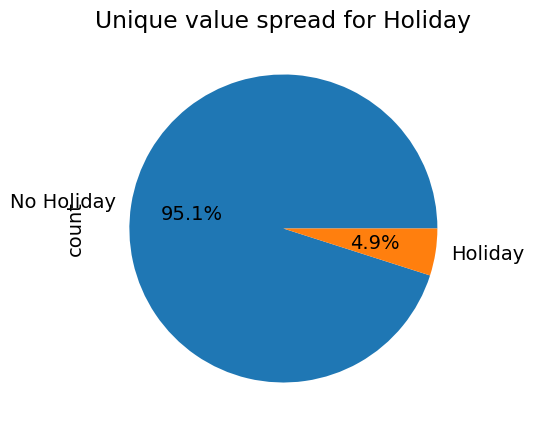

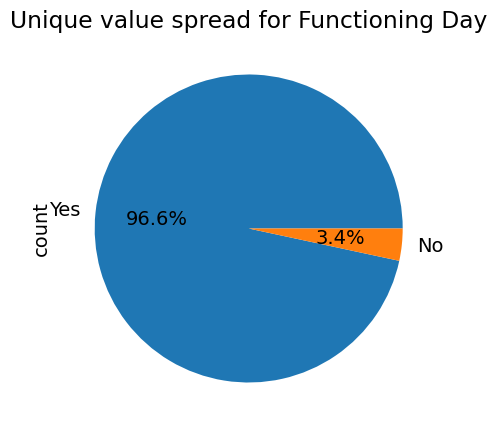

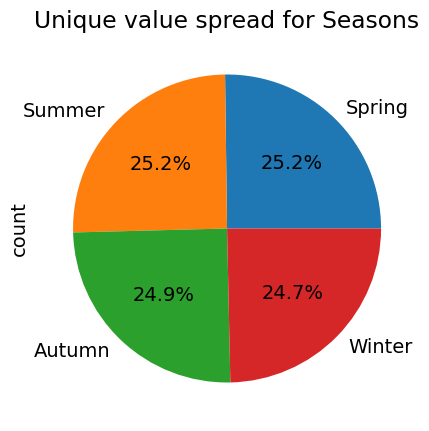

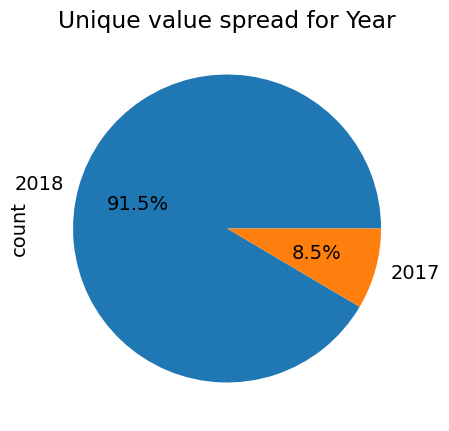

In [59]:
# Chart - 1 visualization code
# since we have minimum unique values for Holiday(2), Functioning day(2), year(2) and Seasons(4),
# we are plotting pie plot to understand their share in the dataframe

# creating a list to loop
x = ['Holiday', 'Functioning Day', 'Seasons', 'Year' ]

# looping for every element in the list
for elements in x:
  spread = df[elements].value_counts()
  plt.rcParams['figure.figsize'] = (5,5)

  # pictdistance 0.6 is set to display the value inside the chart, if set more than 1, it'll display outside the chart.
  spread.plot(kind = 'pie', autopct='%1.1f%%', pctdistance=0.6)

  #setting colum chart title
  plt.title(f'Unique value spread for {elements}')
  plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are easy to interpret and understand the logic and share of values better in percentage.

##### 2. What is/are the insight(s) found from the chart?

1. Its is observed that 95% of days are working(not holiday) and 4.9% of days are holidays in the data given.
2. 96.6 % of values are recorded as functioning day where are the remaining are non functioning day
3. the data recorded in various season are almost equal (near to 25%)
4. the data has records of year 2017 and 2018 where most of the data belongs to 2018(91.5%) where as for 2017 its 8.5%.
5. the start date is 2017-01-12 and last date is 2018-12-11
the following code was used to extract information on point 5 before droping the date column
>```
min_date= df['Date'].min()
max_date = df['Date'].max()
print(f'the start date is {min_date} and last date is {max_date}')
>```



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is understood that mostly the days are functional or not holiday.

the data is captured for all the season, analysis can be more strong as data for all seasons is captured including functioning day and holidays.

the captured data falls under the range start date = 01-12-2017 and last date = 30-11-2018

#### Chart - 2 (Bar Plot)
total rented bike w.r.t Holiday, functioning Day, season and Year

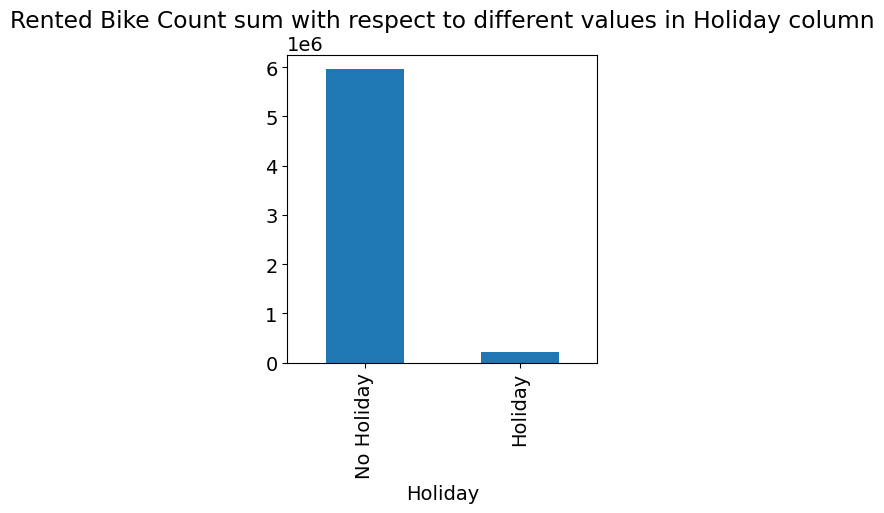

Holiday
No Holiday    5956419
Holiday        215895
Name: Rented Bike Count, dtype: int64


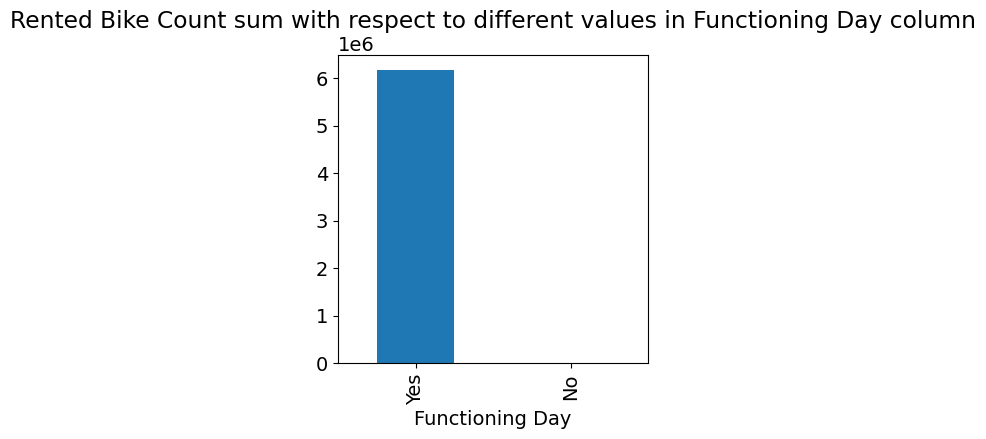

Functioning Day
Yes    6172314
No           0
Name: Rented Bike Count, dtype: int64


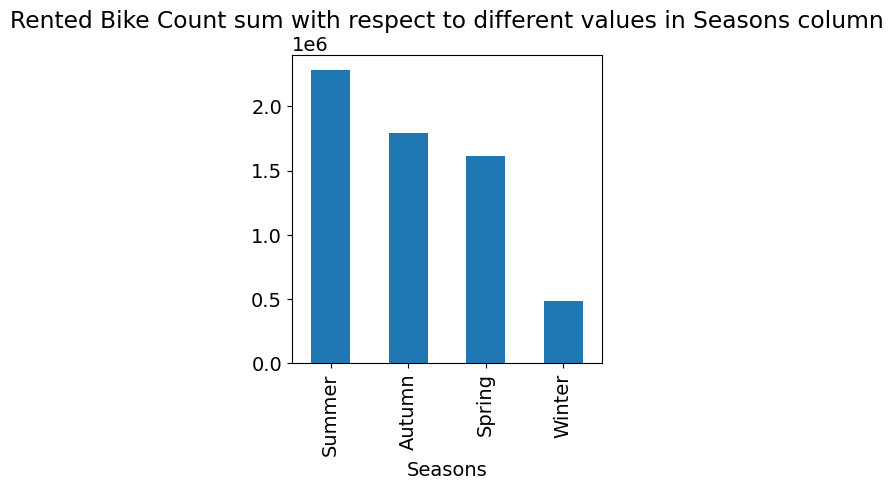

Seasons
Summer    2283234
Autumn    1790002
Spring    1611909
Winter     487169
Name: Rented Bike Count, dtype: int64


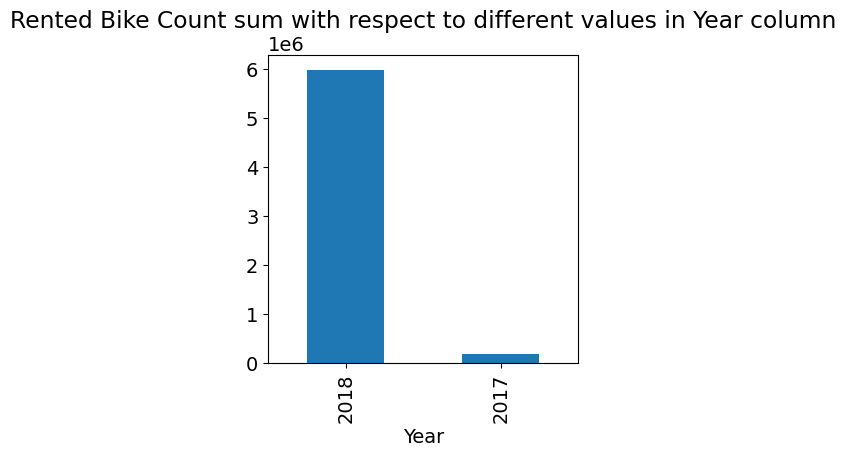

Year
2018    5986984
2017     185330
Name: Rented Bike Count, dtype: int64


In [60]:
# Chart - 2 visualization code
# since we have minimum unique values for Holiday(2), Functioning day(2), Seasons(4), and Year(2)
# we are plotting bar plot to understand total rented bikes sum with respect to each category

# creating a list to loop
x = ['Holiday', 'Functioning Day', 'Seasons', 'Year' ]

# looping for every element in the list
for elements in x:
  rented_bike_sum = df.groupby(elements)['Rented Bike Count'].sum().sort_values(ascending = False)
  plt.rcParams['figure.figsize'] = (4,4)
  # plotting bar plot
  rented_bike_sum.plot.bar()

  #setting column chart title to infer about the chart
  plt.title(f'Rented Bike Count sum with respect to different values in {elements} column')
  plt.show()
  # printing values obtained for reference
  print(rented_bike_sum)

##### 1. Why did you pick the specific chart?

bar charts show the sum beautifully and helps us interpret in a better way.

##### 2. What is/are the insight(s) found from the chart?

1. the sum of Bikes rented on No Holiday is 5956419 and on Holiday is 215895
2. The sume of bikes rented on Functioning Day is 6172314 and on a non functioning day is 0
3. the following are the sum of bike rented with respect to various seasons
>```
Summer    2283234
Autumn    1790002
Spring    1611909
Winter     487169
>```
>it is found that in winter the bikes are rented less comparitivly and heighest in Summer
4. The total bikes rented in 2018 is 5986984 and in 2017 is 185330


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. It is observed that on a functioning day the bike rented sum is zero, means that on a non functioning day there were no bikes that were rented. the impact of non functioning day has lead to not running the business.
2. During winters the bikes are rented less in numbers which means winters affect the business negativly where as during summer the impact is good and more number of bikes were rented.

#### Chart - 3
Total rented bikes with respect to year and month (Bar Plot)

<Axes: xlabel='Year,Month'>

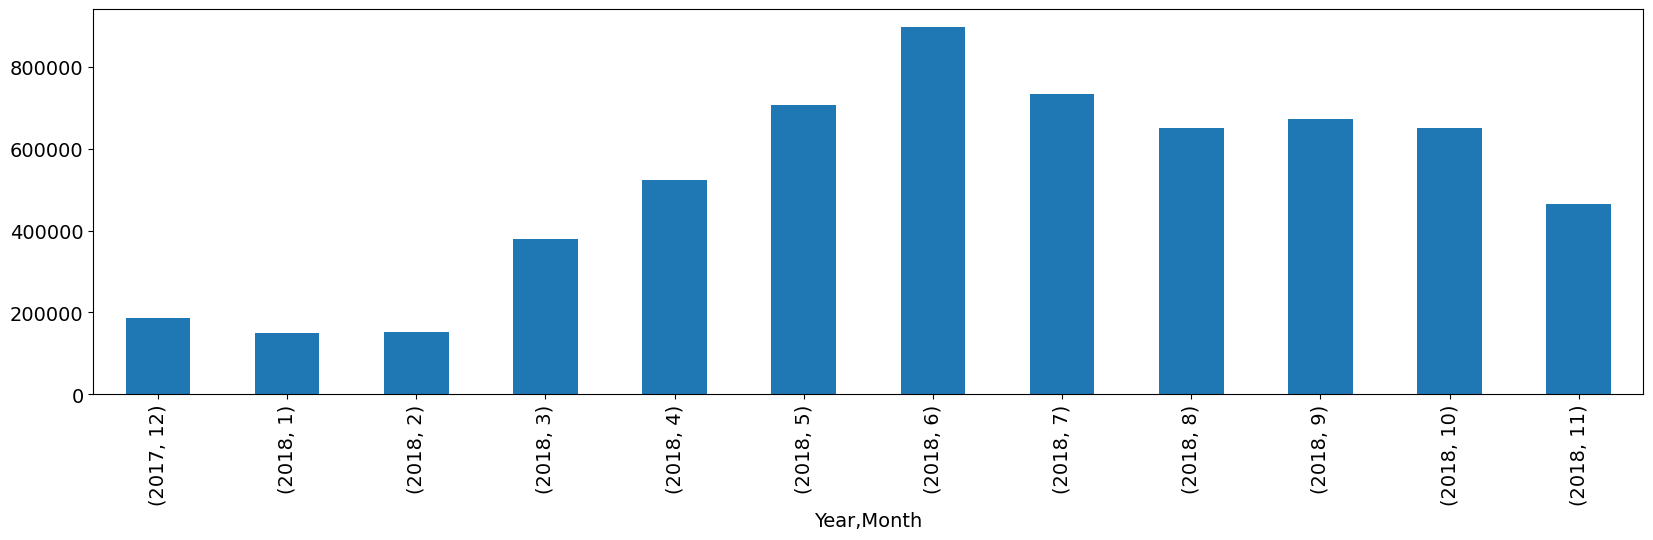

In [61]:
# Chart - 3 visualization code
# as observed in chart 2 with various seasons the bike rented are varing extremly, so plotting with a bar chart to understand with respect to various months
# of the business year
group_by_year_month = df.groupby(['Year', 'Month'])['Rented Bike Count'].sum()
plt.rcParams['figure.figsize'] = (20, 5)
group_by_year_month.plot.bar()

##### 1. Why did you pick the specific chart?

A verticle bar represents the total in a better way

##### 2. What is/are the insight(s) found from the chart?

It is observed that the first 11 months the company had less rented bikes while the bike rentals started to spike from december 2017, though it was not that great however the growth seems to look significant.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

sales were highest in may 2018.

#### Chart - 4 (Point Plots)
Hourly Bike rental with respect to Seasons, Holiday, and year


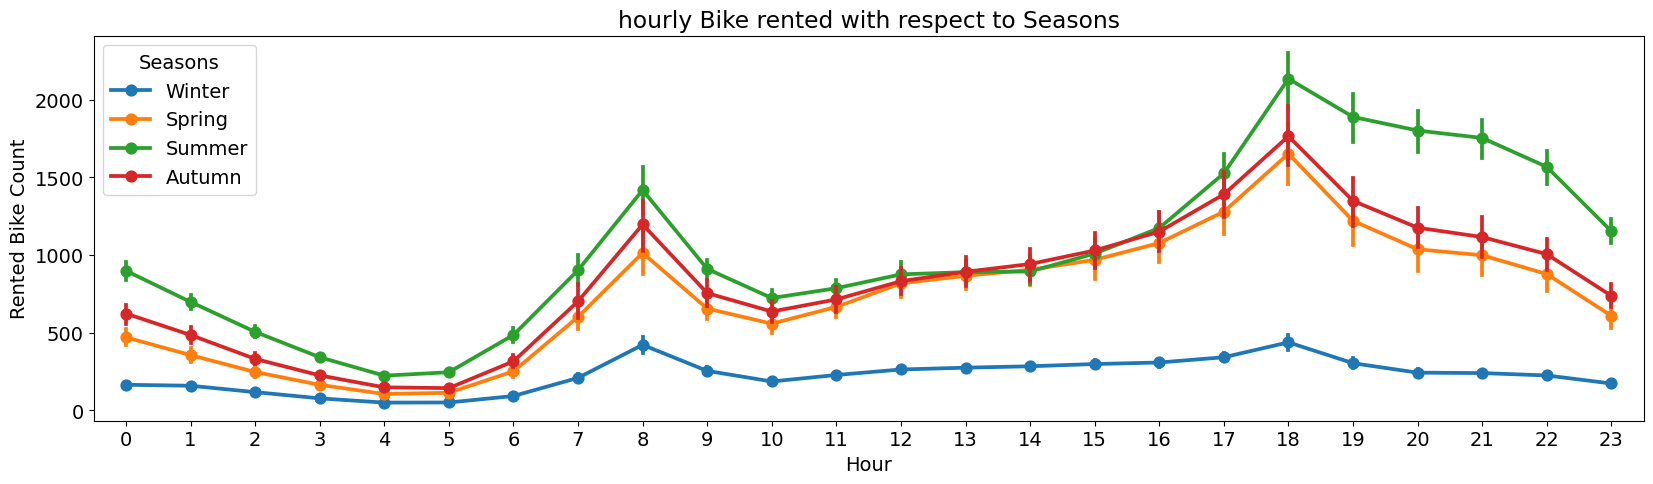

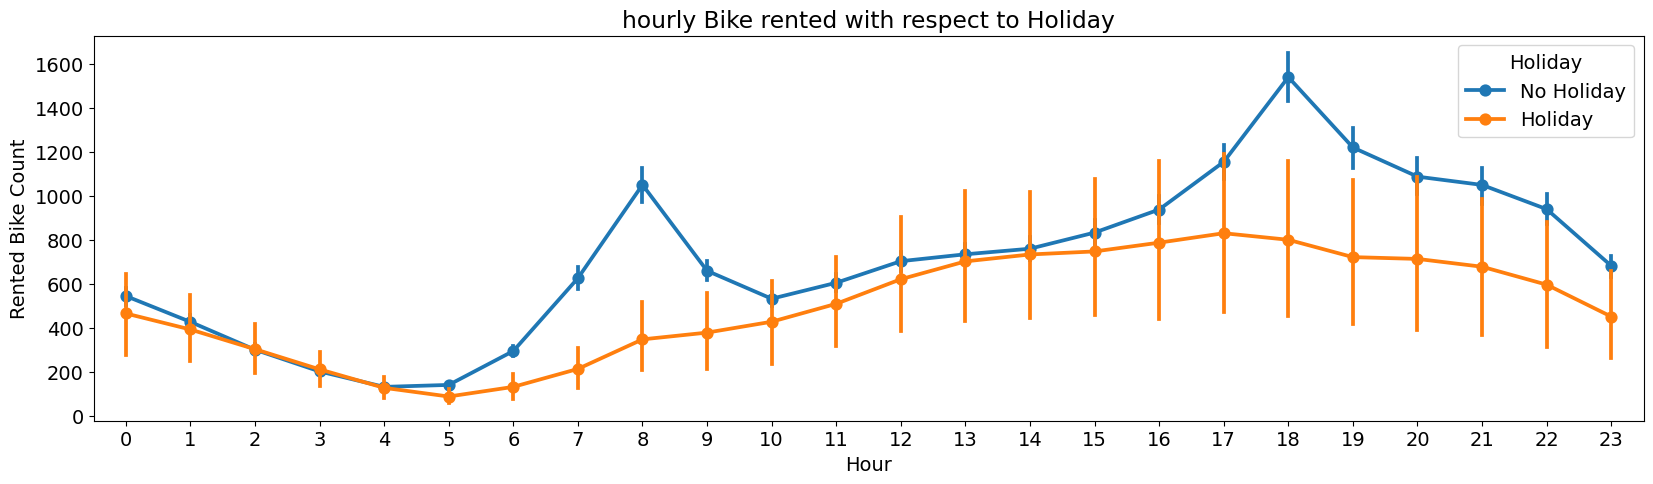

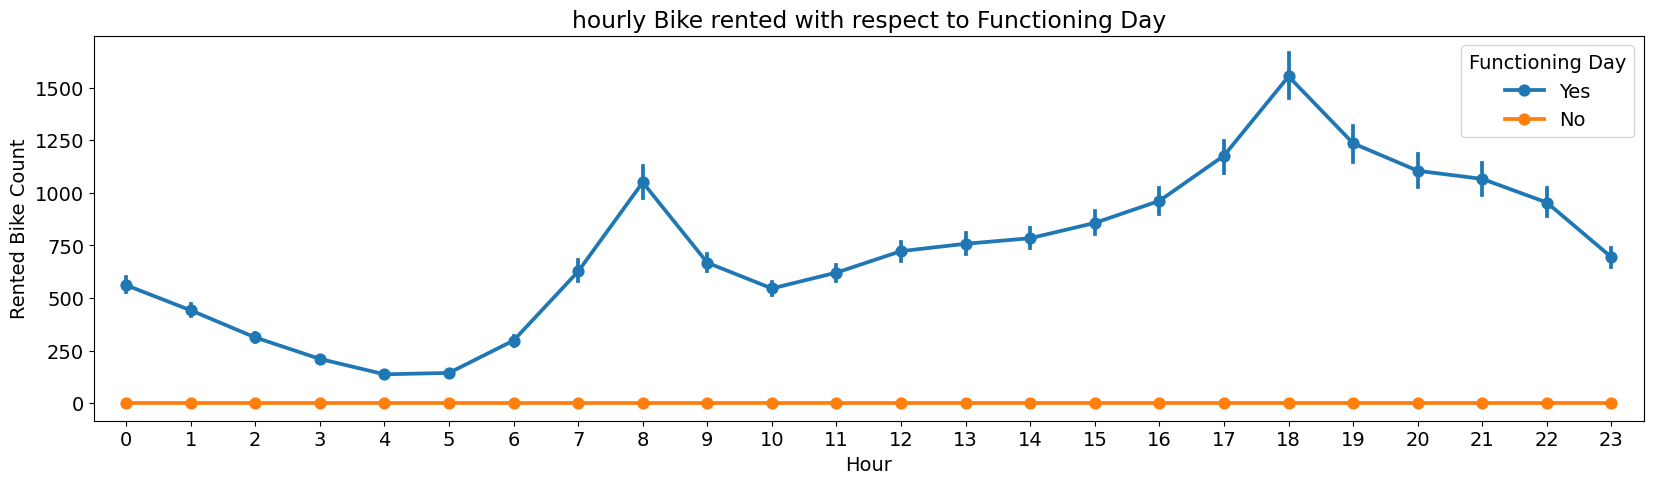

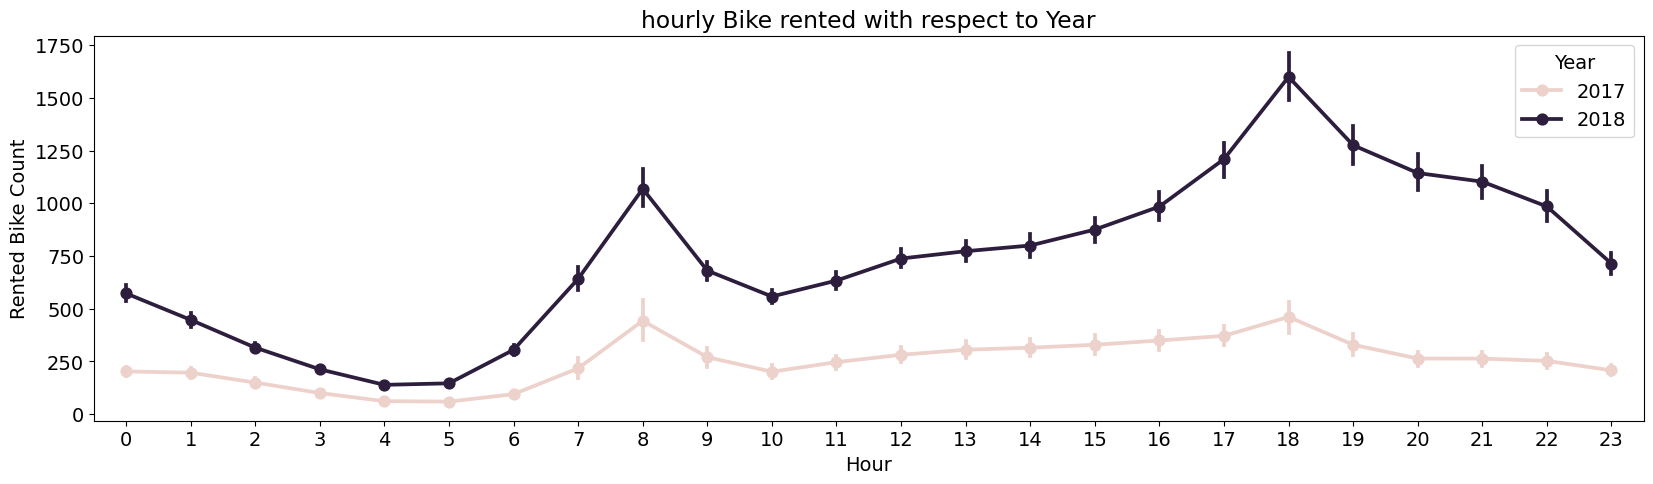

In [62]:
# Chart - 4 visualization code
# Exploring the Bike rentals with respect to Seasons, Holiday, and year
Parameters = ['Seasons', 'Holiday', 'Functioning Day', 'Year']
#looping through all the parameters chosen
for ele in Parameters:
  plt.title(f'hourly Bike rented with respect to {ele}')
  sns.pointplot(data=df, x="Hour", y="Rented Bike Count", hue=ele)
  plt.show()

##### 1. Why did you pick the specific chart?

Sinc the data ranges from 0 to 23 as number of hours, a line chart can represent the data very well.

##### 2. What is/are the insight(s) found from the chart?

1. It is observed that the bikes are rented maximum at 8 hours(8am) and 18 hours(6pm) usually, the demand of bikes is mostly depended on the hour of the day, This can be an indication that people are renting bikes to travel to office and coming back from office.
2. Bike rented during non functional day is Zero
3. Bikes demand is more during Summer and less during the winters

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

it is observed that the bikes are rented maximum at 8 hours(8am) and 18 hours(6pm) usually, the demand of bikes is mostly depended on the hour of the day, This can be an indication that people are renting bikes to travel to office and coming back from office.

In [ ]:
df.head()

#### Chart - 5
Total Bike rented with respect to vairous rainfall values

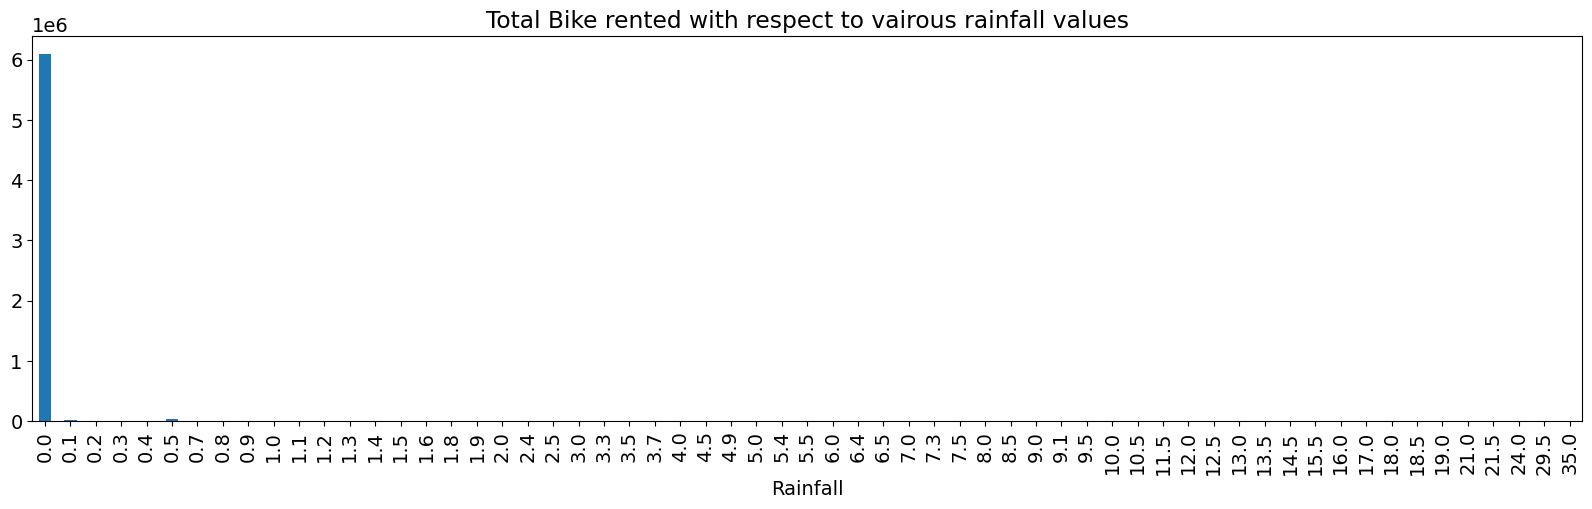

----------------------------------------------------------------------------------------------------
it is found mostly the bikes are rented when rainfall is 0.0, replotting the same after applying log transfrmation
----------------------------------------------------------------------------------------------------


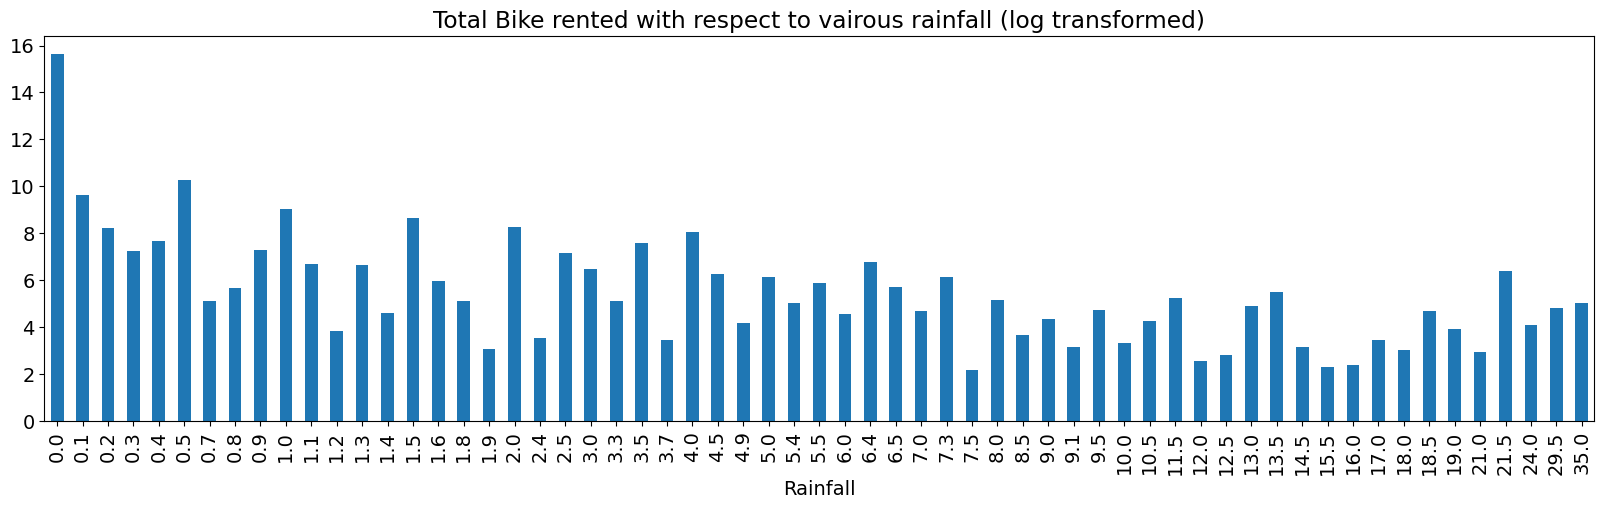

In [63]:
# Chart - 5 visualization code
rainfall_rent = df.groupby(['Rainfall'])['Rented Bike Count'].sum()
plt.rcParams['figure.figsize'] = (20, 5)
rainfall_rent.plot.bar()
plt.title('Total Bike rented with respect to vairous rainfall values')
plt.show()
print('-'*100)
print('it is found mostly the bikes are rented when rainfall is 0.0, replotting the same after applying log transfrmation')
print('-'*100)

rainfall_rent_log = np.log(rainfall_rent)
# rainfall_rent_filtered = rainfall_rent[~(rainfall_rent.index == 0.0)]

rainfall_rent_log.plot.bar()
plt.title('Total Bike rented with respect to vairous rainfall (log transformed)')
plt.show()
# print(rainfall_rent_filtered)

##### 1. Why did you pick the specific chart?

Bar charts give a better understanding for the understanding this situation.

##### 2. What is/are the insight(s) found from the chart?

It was observed that the bike rent was more when the rainfall was 0.0, however when we excluded rainfall values of 0.0, we observed that most of the bikes that were rented were during less values of rainfall.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can infer that most of the people rent bikes when there is less rainfall, and when the rainfall is more the sales decrease with increase in rainfall values.

#### Chart - 6
Total bike rented with respect to various conditions of Wind Speed

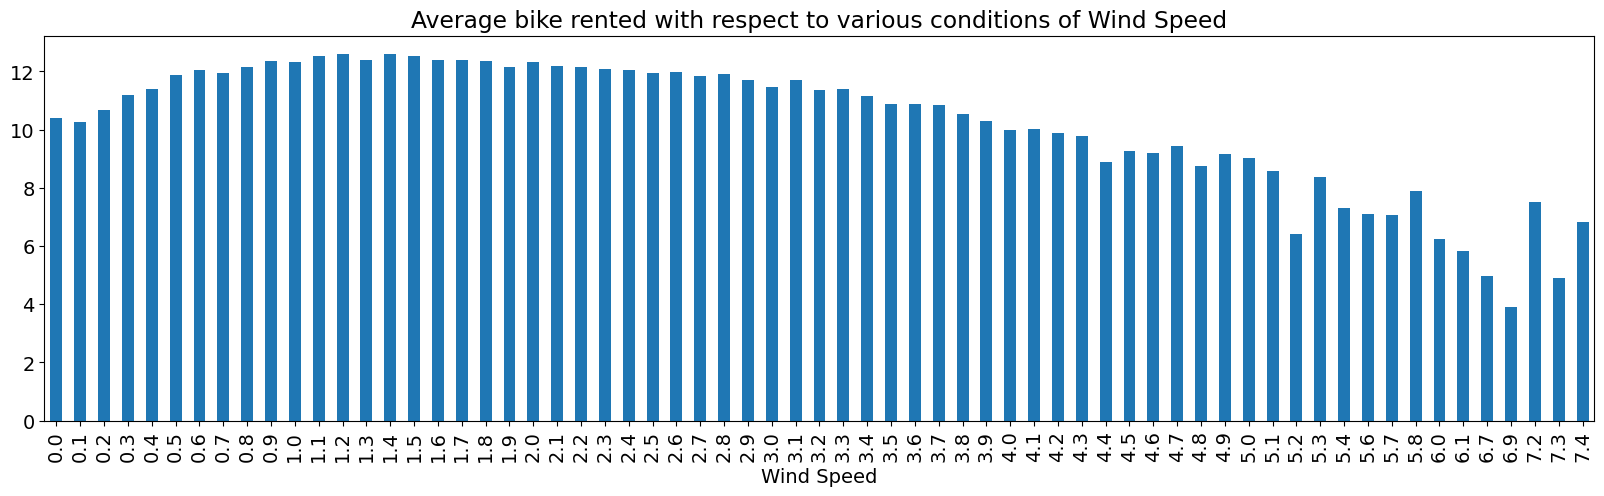

----------------------------------------------------------------------------------------------------
Wind speed does not affect much the booking, the average is almost uniformly distributed
----------------------------------------------------------------------------------------------------


In [64]:
# Chart - 6 visualization code
windspeed_vs_rented_sum = df.groupby(['Wind Speed'])['Rented Bike Count'].sum()
plt.rcParams['figure.figsize'] = (20, 5)
windspeed_vs_rented_sum = np.log(windspeed_vs_rented_sum)
windspeed_vs_rented_sum.plot.bar()
plt.title('Average bike rented with respect to various conditions of Wind Speed')
plt.show()
print('-'*100)
print('Wind speed does not affect much the booking, the average is almost uniformly distributed')
print('-'*100)


##### 1. Why did you pick the specific chart?

Bar charts give a better understanding for the understanding this situation.

##### 2. What is/are the insight(s) found from the chart?

The data is positivly sewed, We see that when there is low wind speed or high wind speed the bookings are less, people prefer to drive bike when the wind speed is moderate between 0.3 to 3.4

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

People prefer to drive bike when the wind speed is moderate between 0.3 to 3.4.
there is an impcat of wind speed on the bike renting preference

#### Chart - 7

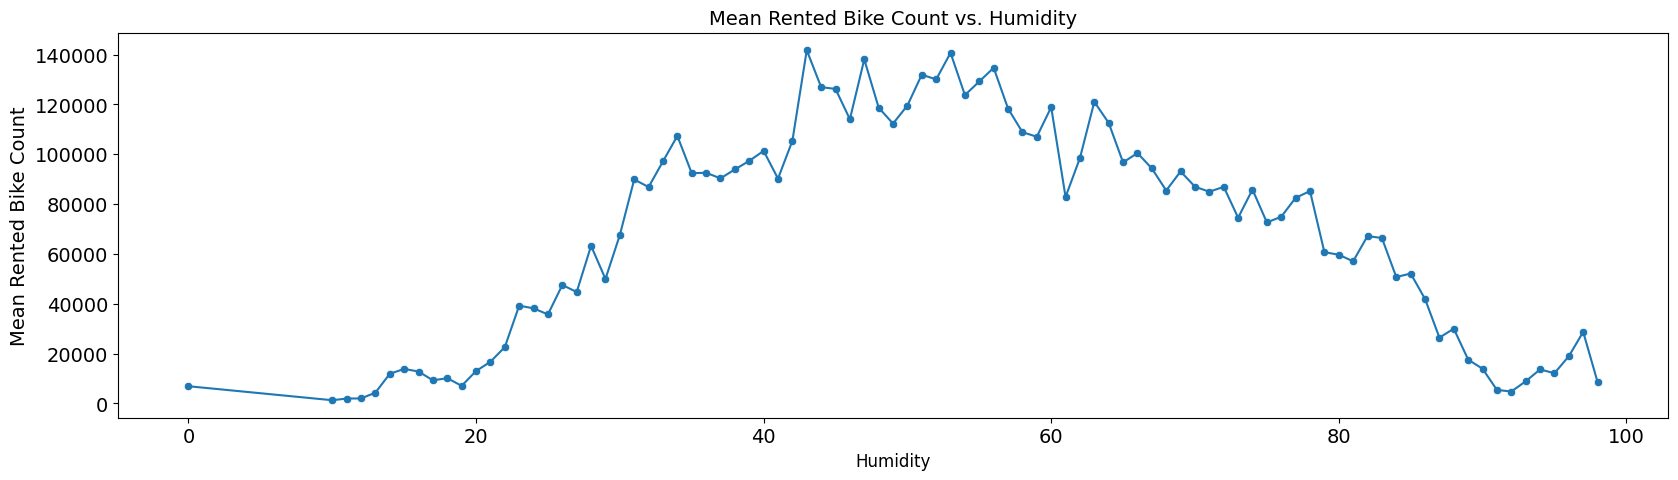

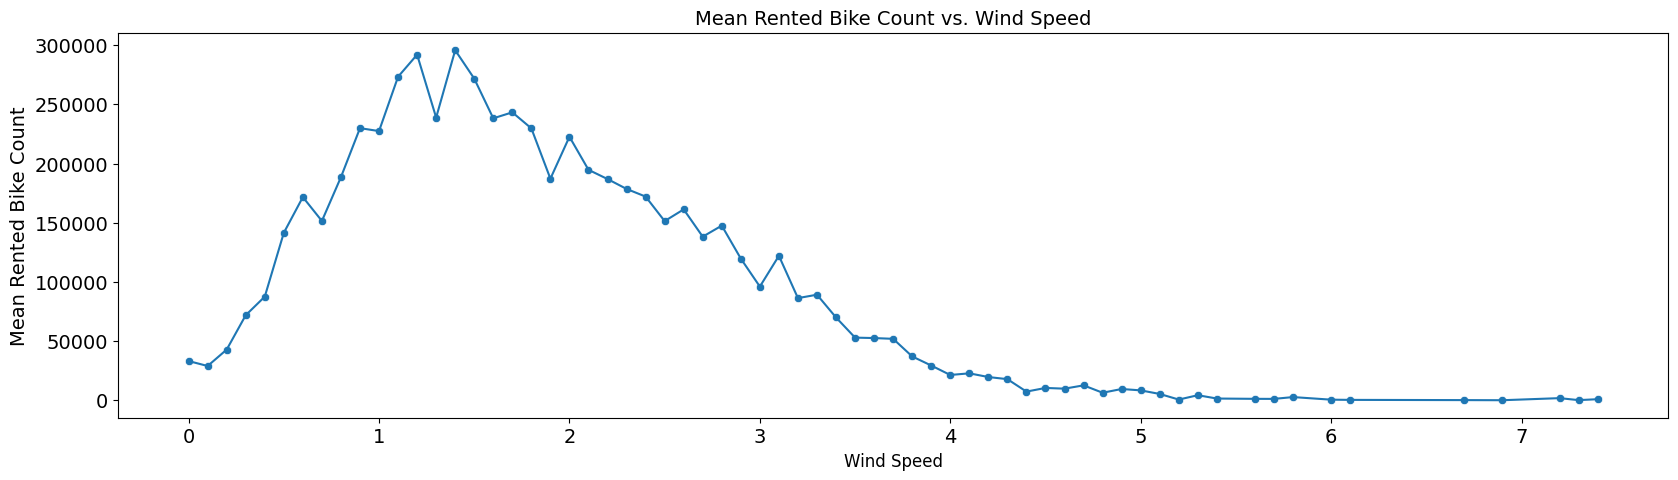

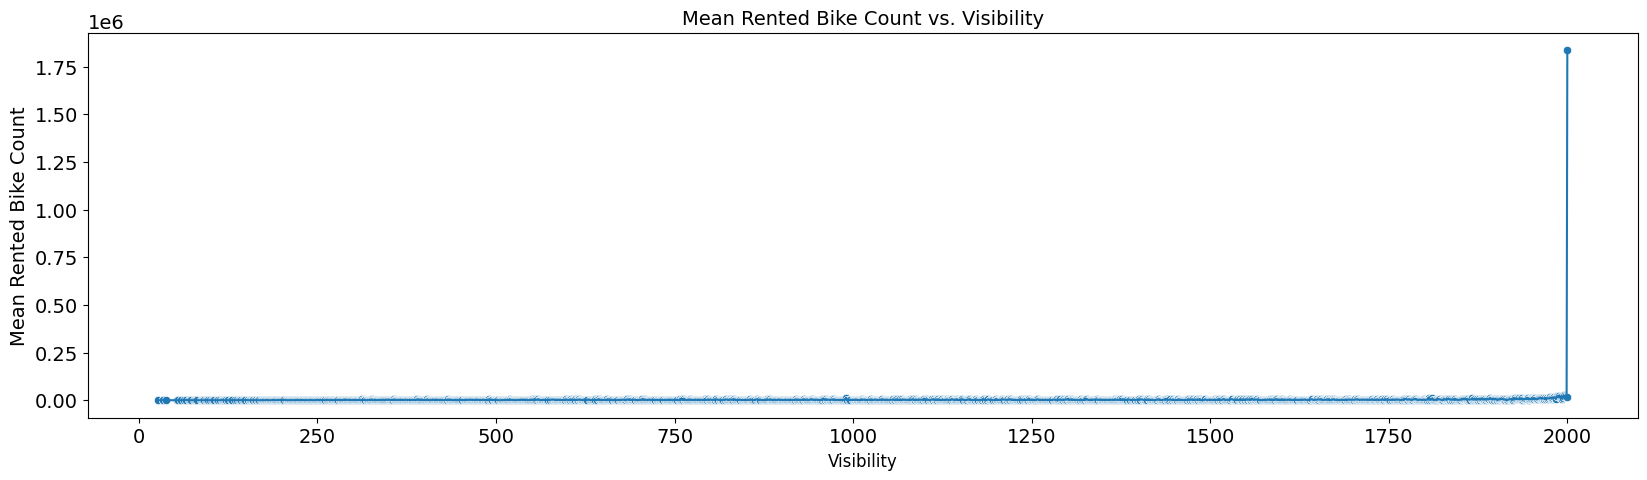

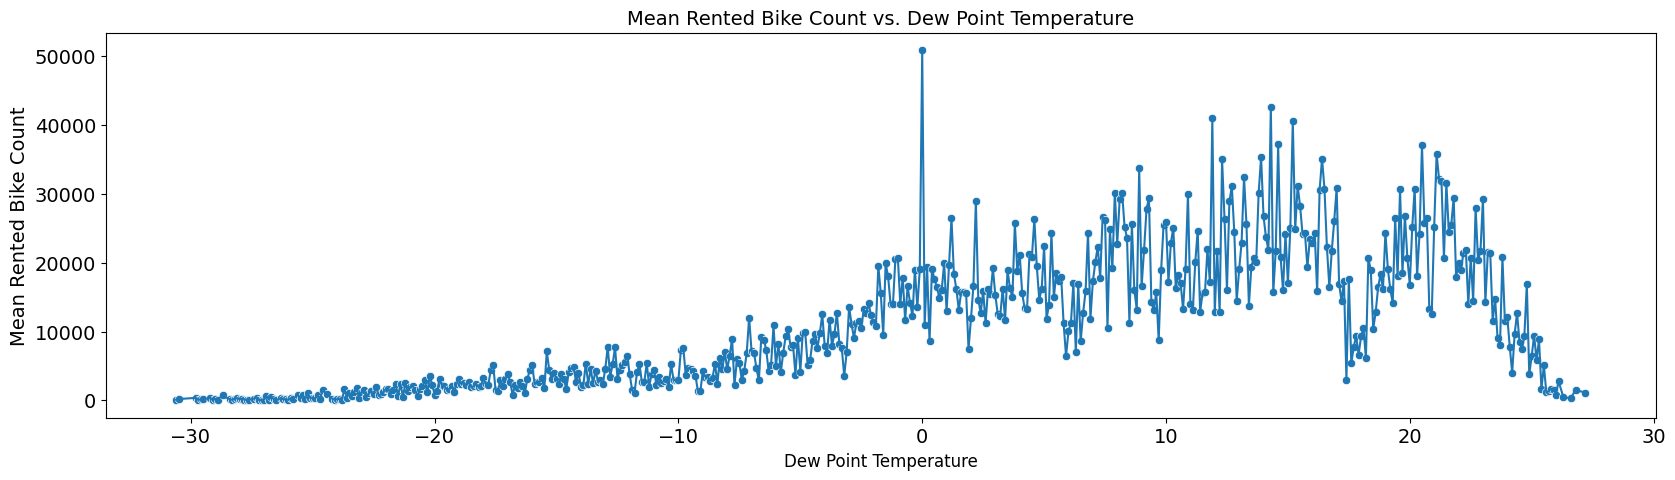

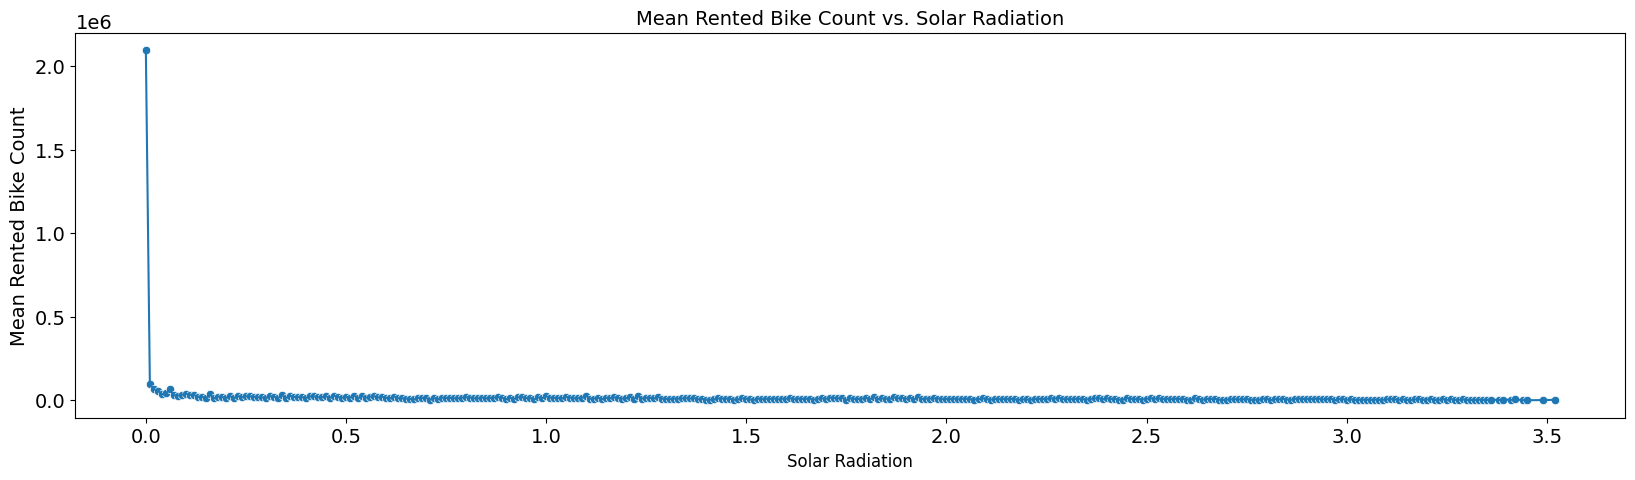

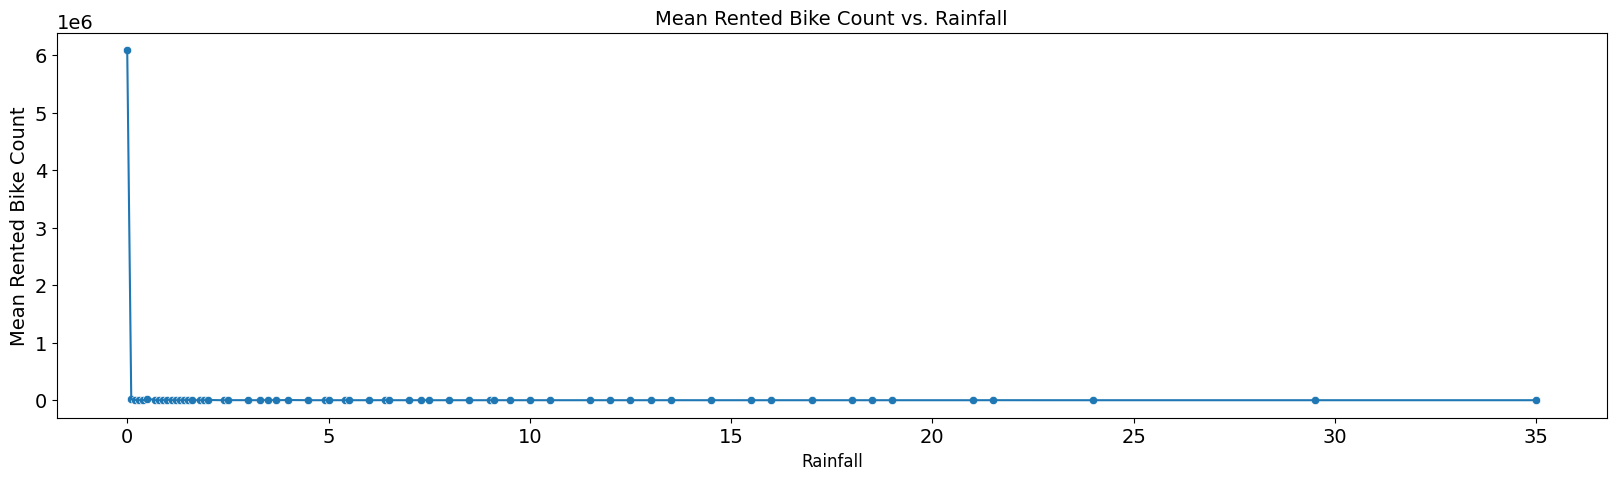

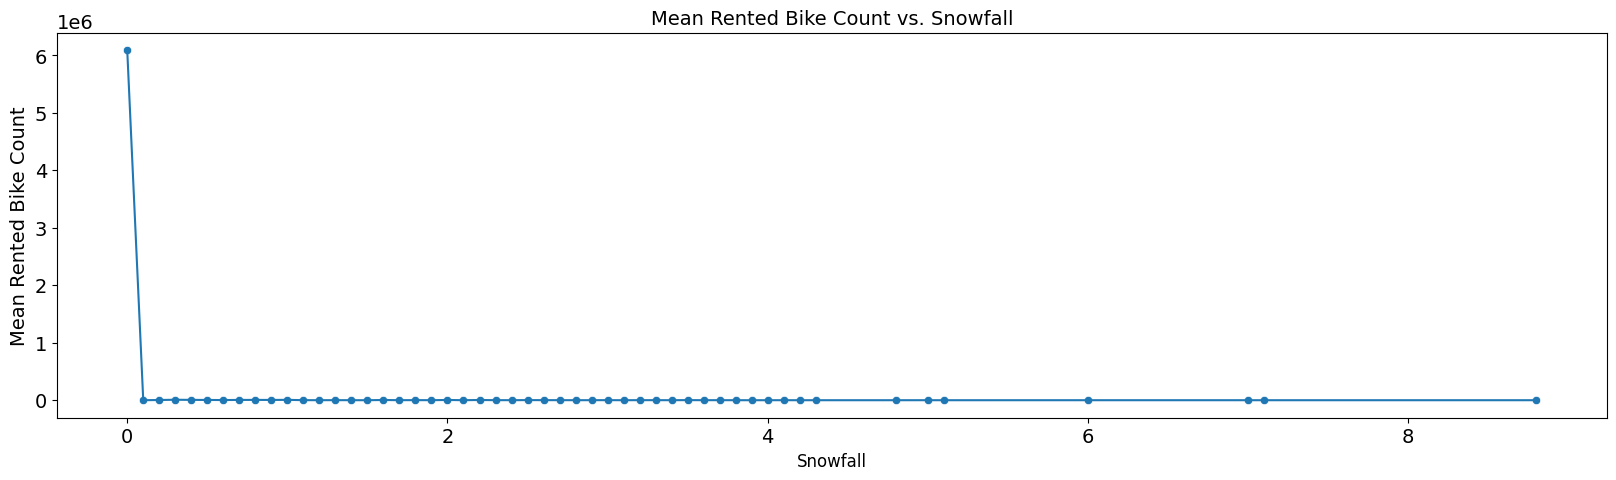

In [65]:
# Chart - 7 visualization code

numrical_features = ['Humidity', 'Wind Speed',  'Visibility', 'Dew Point Temperature', 'Solar Radiation', 'Rainfall', 'Snowfall']

for feature in numrical_features:
  temp_df = df.groupby([feature])['Rented Bike Count'].sum()
  temp_df = temp_df.reset_index()
  sns.scatterplot(data=temp_df, x=feature, y='Rented Bike Count')
  sns.lineplot(x=feature, y='Rented Bike Count', data=temp_df)
  plt.xlabel(feature,  fontsize=12)
  plt.ylabel('Mean Rented Bike Count',  fontsize=14)
  plt.title(f'Mean Rented Bike Count vs. {feature}',  fontsize=14)
  plt.show()

##### 1. Why did you pick the specific chart?

we have used the combination of line and scatterplot for the count of rental bike on the
numrical_features = 'Humidity', 'Wind Speed',  'Visibility', 'Dew Point Temperature', 'Solar Radiation', 'Rainfall', 'Snowfall'

##### 2. What is/are the insight(s) found from the chart?

The fowolling are the insigths we found from the above graph

1.When the humidity is betwen 20 to 90 the number of rental bikes increses . the highest bike rented is when the humidity is between 40 to 55

2.When the wind speed is between 0.5 to 3.5 the number of rental bikes increses.
the highest bike are rented when the wind speed is between 1 to 2

3.When the dew point tempersture is between -10 to 20  the number of rental bikes increses. the highest bikes are rented when the dew point temperature is between 0 to 15

4.When the solar radiation is 0 the number of rental bikes incresed

5.most bikes are rented when the rainfall is 0

6.Most bikess are rented when the snowfall is 0


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights helps the business man creating a positive business because he got to know when the rental bikes is on demand

#### Chart - 8

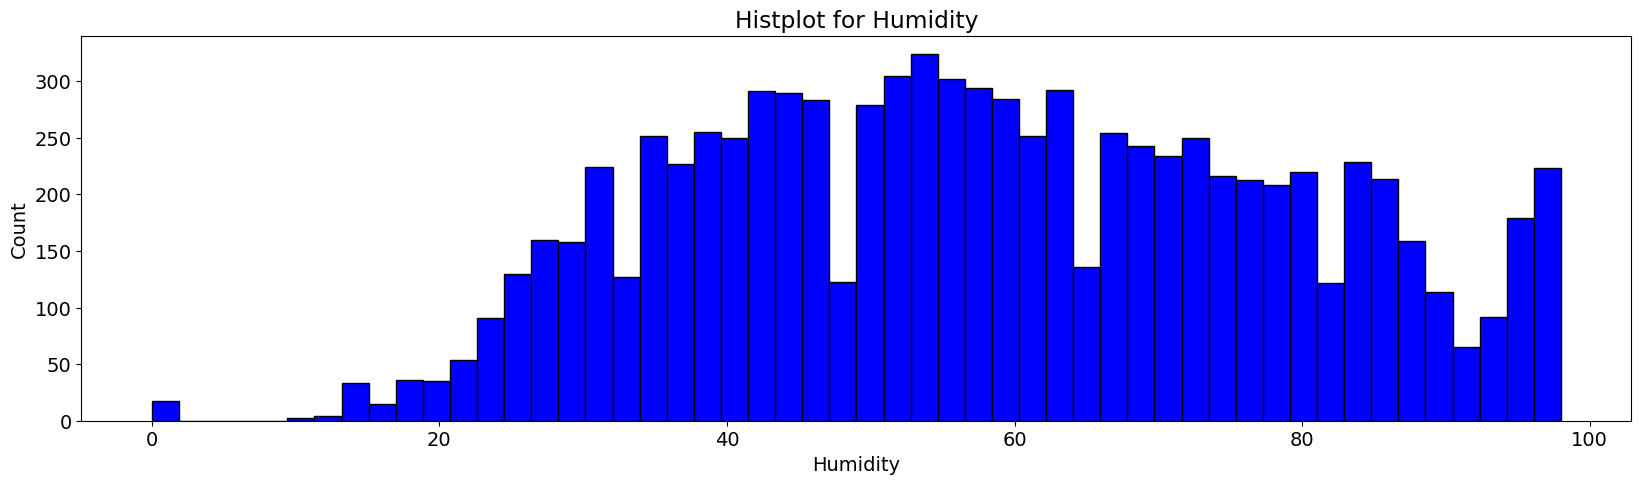

In [66]:
# # Chart - 8 visualization code
plt.hist(df['Humidity'], bins=52, color='blue', edgecolor='black')

plt.xlabel('Humidity')
plt.ylabel('Count')
plt.title('Histplot for Humidity')
plt.show()

##### 1. Why did you pick the specific chart?

We have picked histogram plot on Humidity to get the count of rental bikes on specific HUMIDITY

##### 2. What is/are the insight(s) found from the chart?

The count of rental bikes incrases from 20 to 90 .But the highest rented bike is when the humidity is between 40 to 80

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

People prefer to rent the bike when the humidity is 20 to 80 . Humidity has an effect on rental bikes.

#### Chart - 9

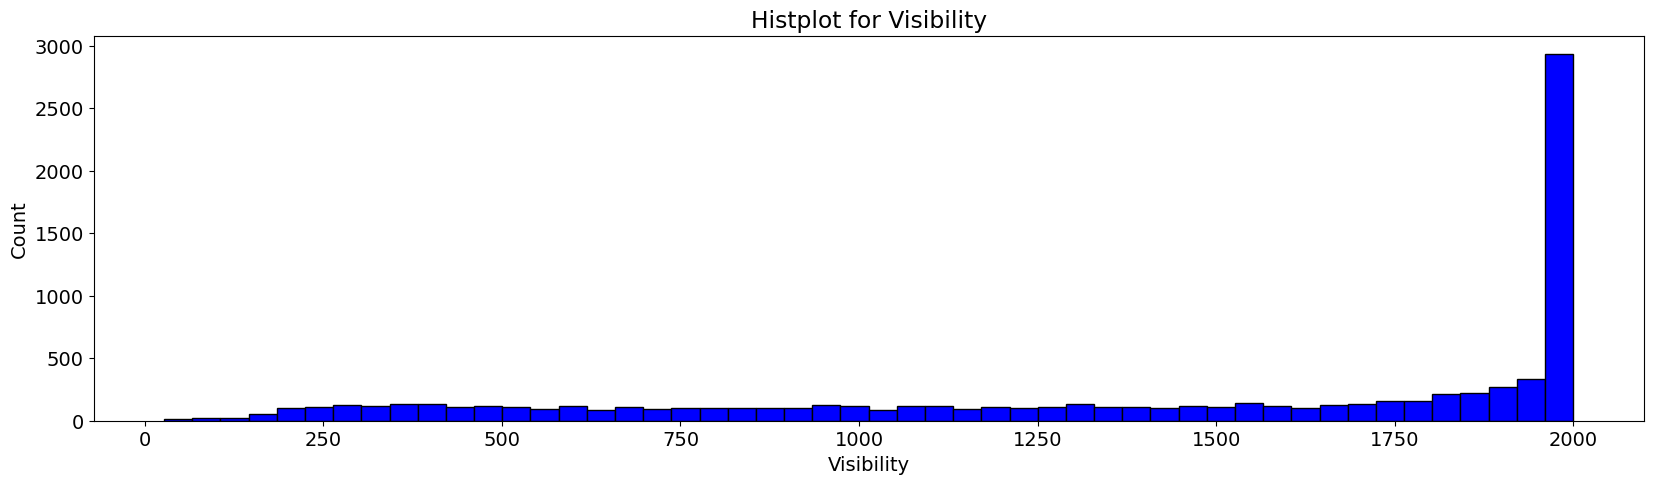

In [67]:
# Chart - 9 visualization code

plt.hist(df['Visibility'], bins=50, color='blue', edgecolor='black')

plt.xlabel('Visibility')
plt.ylabel('Count')
plt.title('Histplot for Visibility')
plt.show()


##### 1. Why did you pick the specific chart?

Histogram chart shows the quantitative of the visibility


##### 2. What is/are the insight(s) found from the chart?

Histogram chart shows the rental bikes are on huge demand when the visibility is 2000

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

When visibilty is 2000 people prefer the most to rent bikes

#### Chart - 10

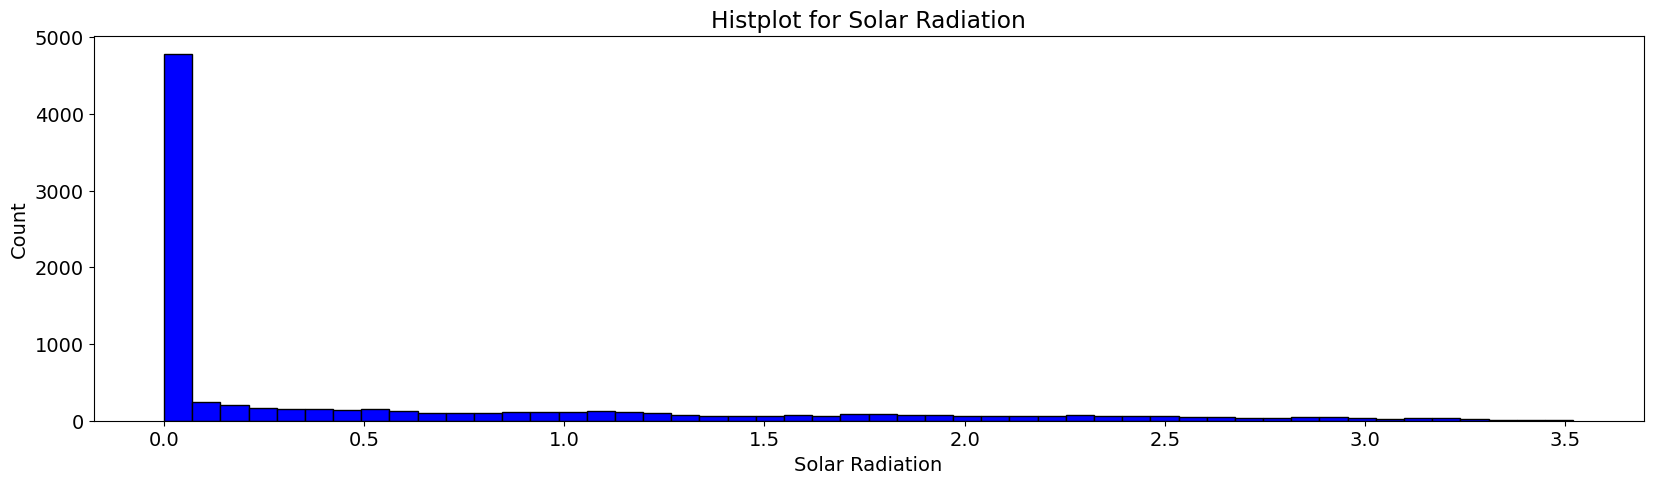

In [68]:
# Chart - 10 visualization code

plt.hist(df['Solar Radiation'], bins=50, color='blue', edgecolor='black')

plt.xlabel('Solar Radiation')
plt.ylabel('Count')
plt.title('Histplot for Solar Radiation')
plt.show()

##### 1. Why did you pick the specific chart?

Histogram chart shows the quantitave of rental bikes

##### 2. What is/are the insight(s) found from the chart?

Demand of rental bikes is on the low solar radiation i.e 0.0

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

people do not prefer to rent a bike when there is a solar radiation > 0.05

#### Chart - 11
Plotting displots to analyze the distribution of all numerical features

In [69]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature', 'Humidity', 'Wind Speed',
       'Visibility', 'Dew Point Temperature', 'Solar Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning Day', 'Year', 'Month',
       'Day'],
      dtype='object')

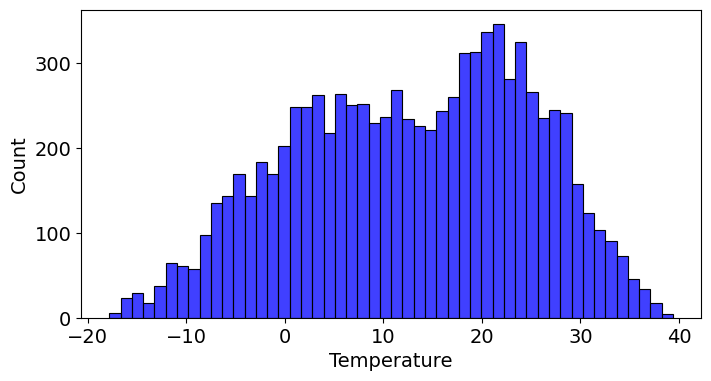

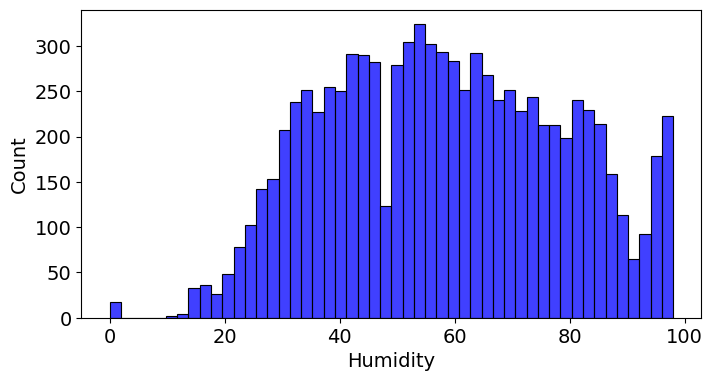

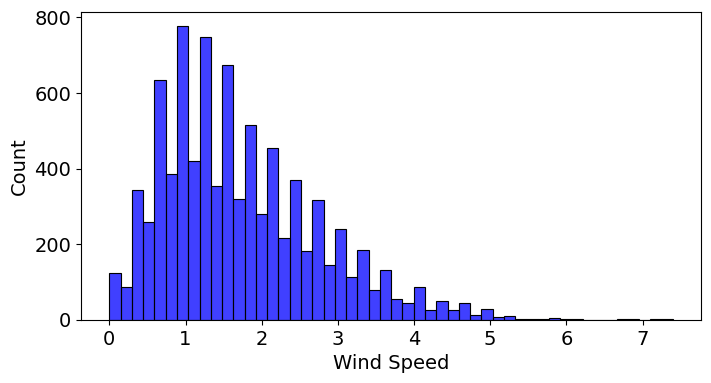

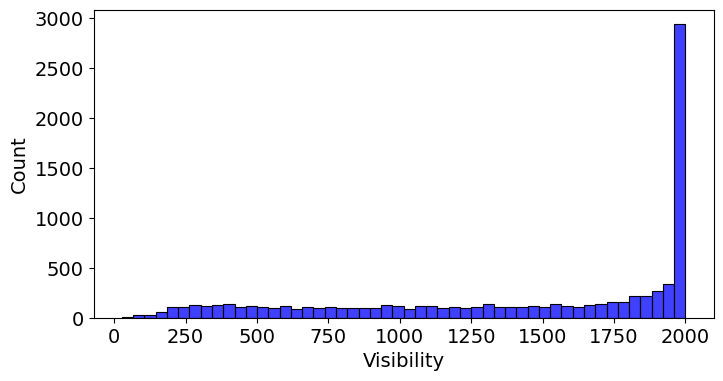

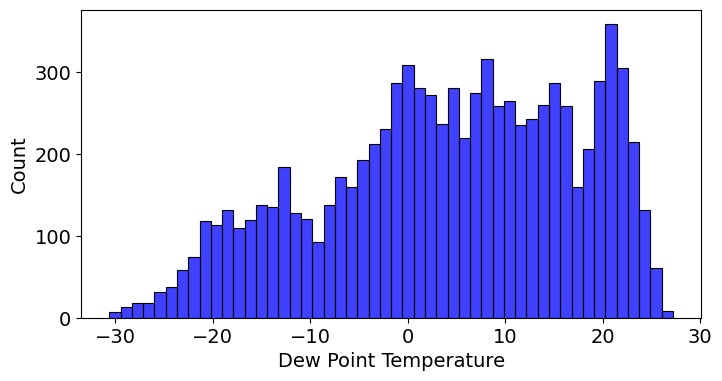

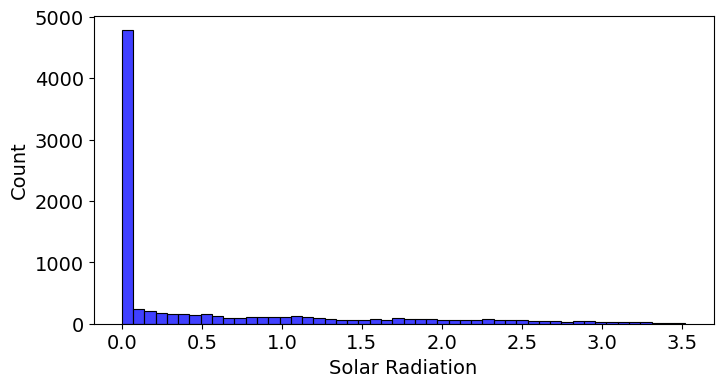

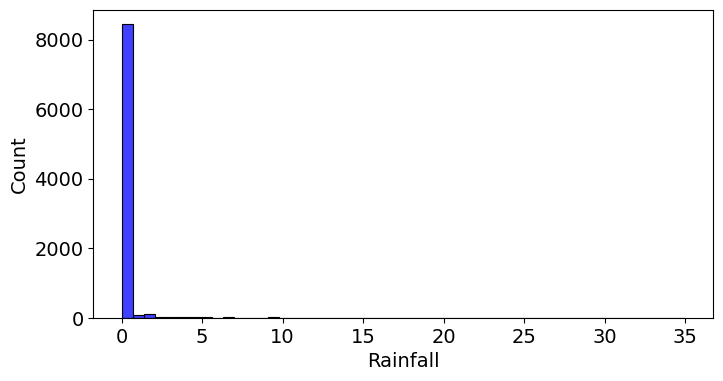

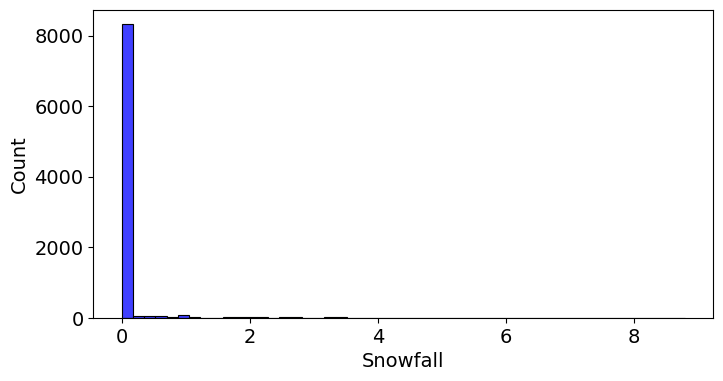

In [70]:
# Chart - 11 visualization code
# Plotting displots to analyze the distribution of all numerical features

#assign the numerical coulmn to variable
selected_features = ['Temperature', 'Humidity','Wind Speed', 'Visibility', 'Dew Point Temperature', 'Solar Radiation', 'Rainfall', 'Snowfall']


for col in selected_features:
  plt.figure(figsize=(8,4))
  sns.histplot(df[col], bins=50, color='blue', edgecolor='black')
  plt.xlabel(col)
  plt.show

##### 1. Why did you pick the specific chart?

histogram shows the better quantitative of the feature

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is just the culmination of all the graphs explained above.

#### Chart - 12
regression plot for all the numerical features

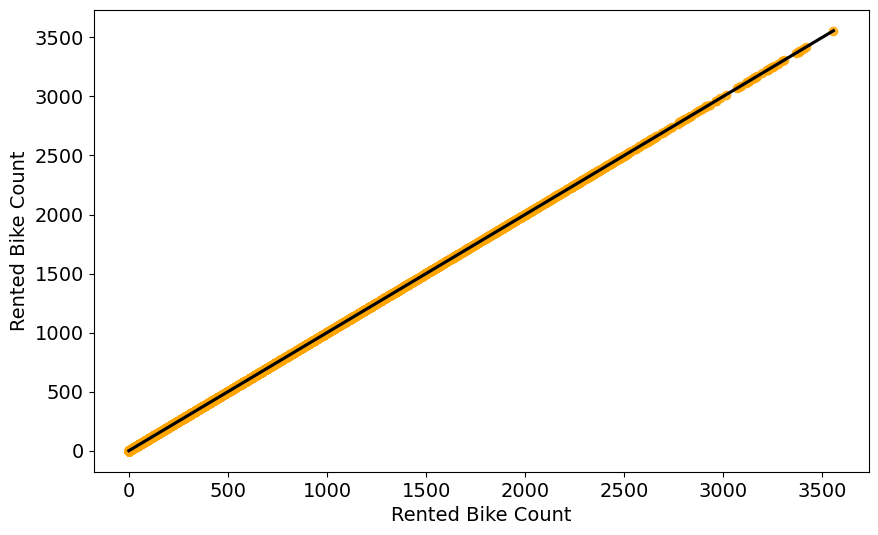

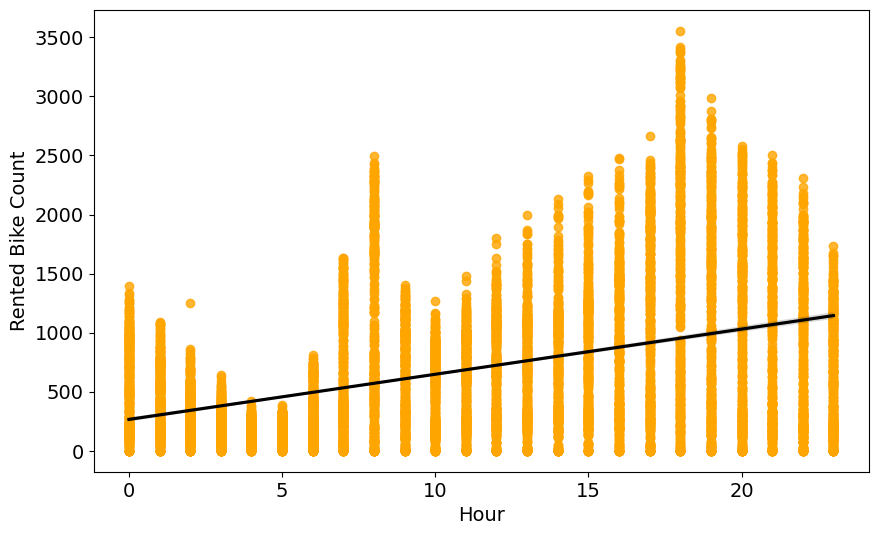

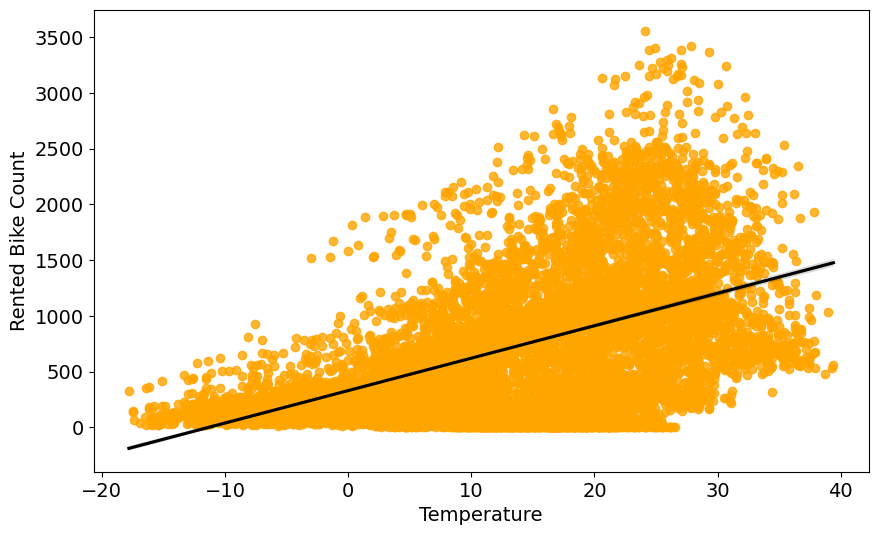

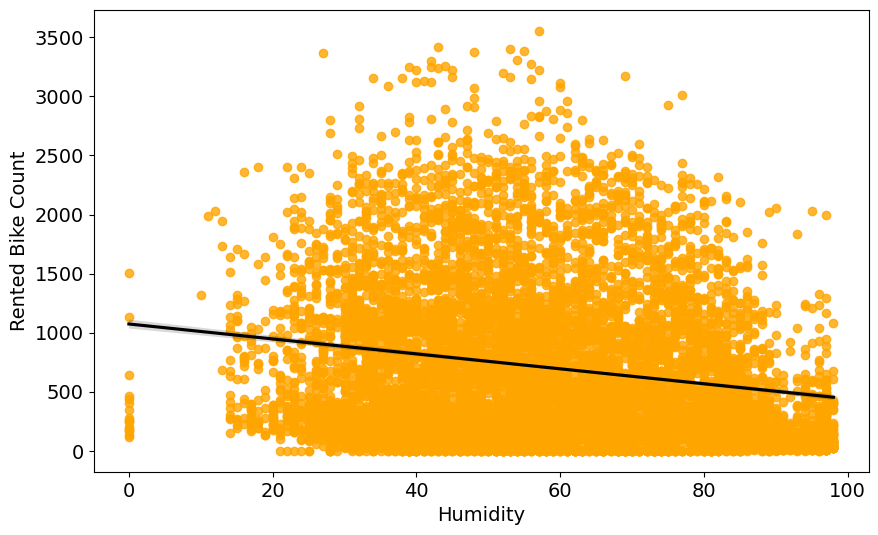

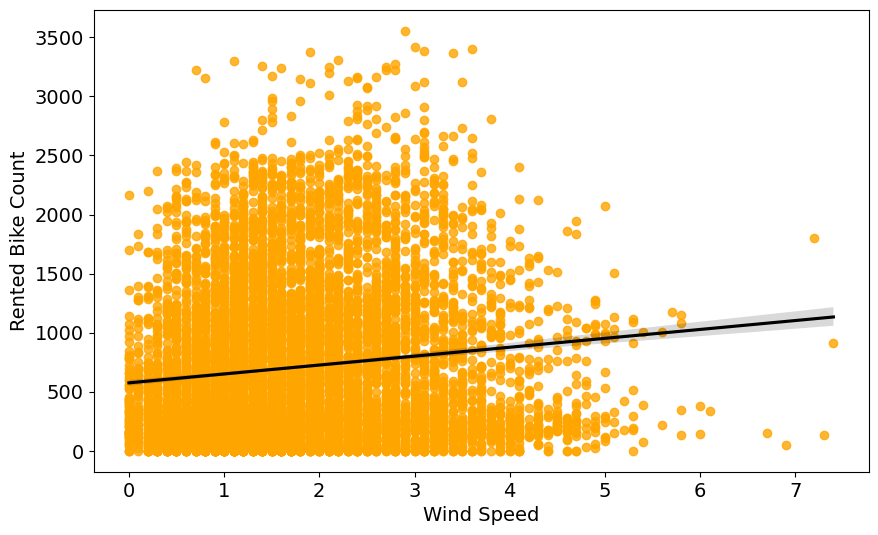

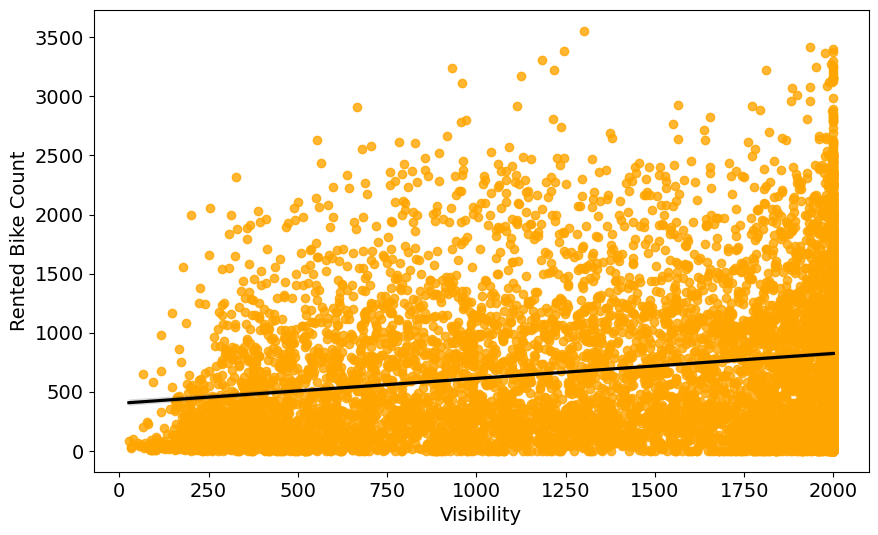

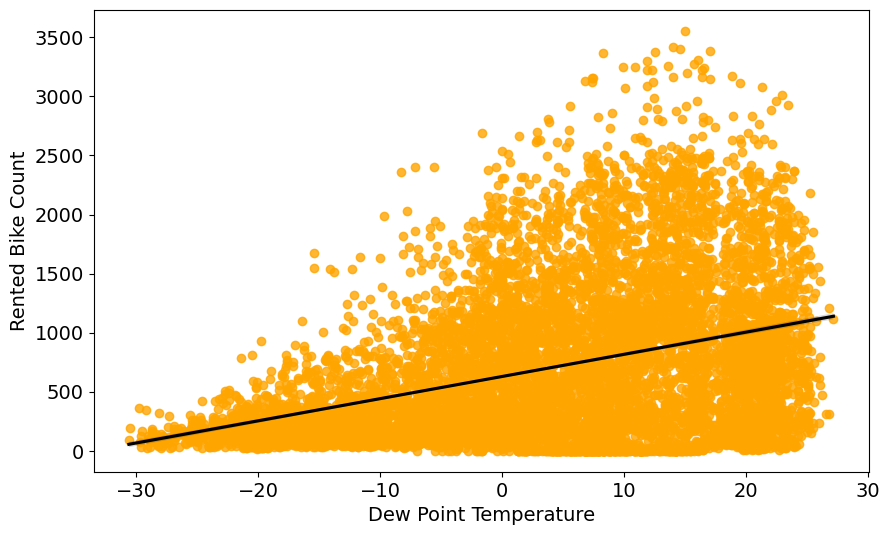

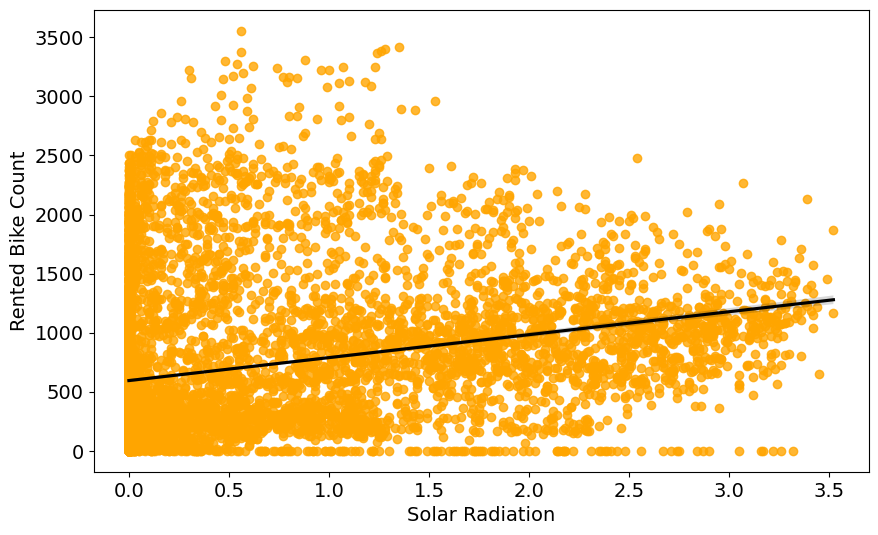

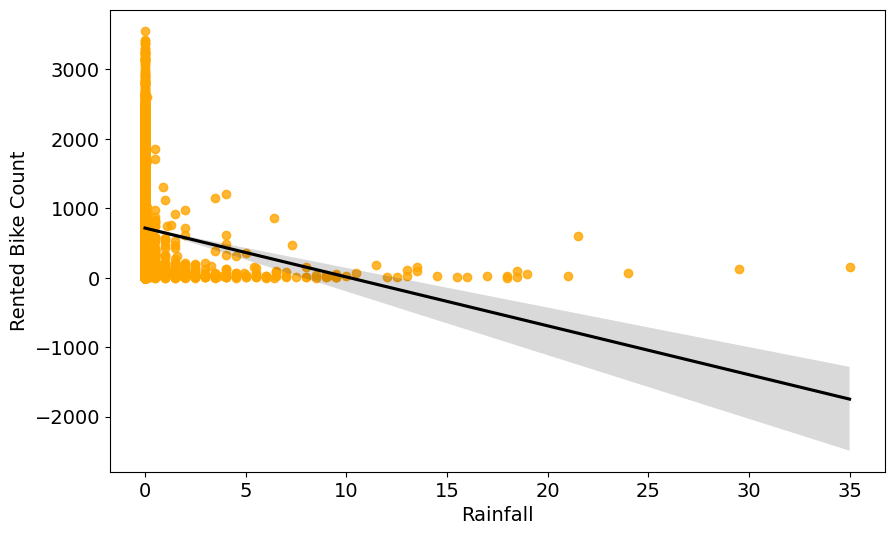

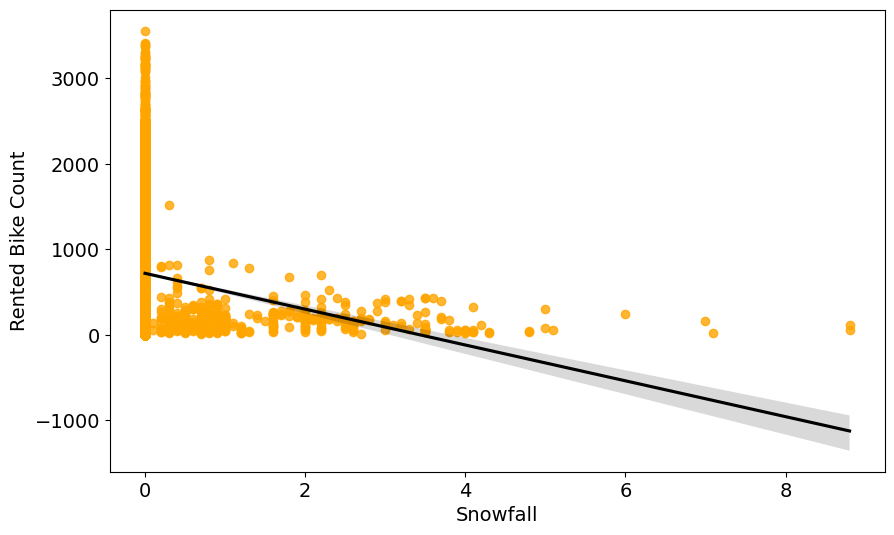

In [71]:
# Chart - 12 visualization code
#printing the regression plot for all the numerical features
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented Bike Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

##### 1. Why did you pick the specific chart?

Linear Regression show the best fit line for the data i.e the avg increase in X with respect to Y

##### 2. What is/are the insight(s) found from the chart?

The insights we found are he following below

1.The increase in temperature(X) from -10 to 30 the demand of rental bikes increases(Y)

2.For the increse in humidity (X) the demand of renatl bikes decreases (Y)

3.For the increase in wind speed(X) from 0 to 3 the demand of rental bikes increases(Y)

4.The best line for visibilty(X) is not  showing any increase of rental bike(Y)

5.The best fit line for  the Dew point temperature is increasing (X) with respect to increase in rental bikes(X)

6.The best fit line for solar radiation (X)  normally increasing with repect to rental bikes

7. The best fit line for the snowfall and rainfall is decresing with respect to rental bikes

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights for bussinees is the avg demand of rental bikes on the specific conditions of the environment

#### Chart - 13

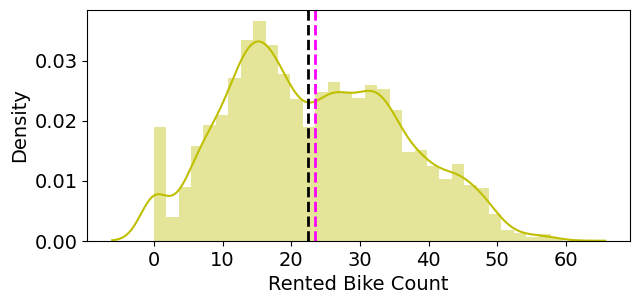

In [72]:
# Chart - 13 visualization code
# Chart - 9 visualization code
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(7,3))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Rented Bike Count']), color="y")
ax.axvline(np.sqrt(df['Rented Bike Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Rented Bike Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

##### 1. Why did you pick the specific chart?

The distribution chart shows the distributon of the rent bike counts

##### 2. What is/are the insight(s) found from the chart?

we found the mean and median distribution of the rented bikes

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

mean and median are nearly equal on the rental bikes

#### Chart - 14 - Correlation Heatmap

In [73]:
# Correlation Heatmap visualization code
'''corr_matrix = df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='inferno')

#setting labels to infer the plot
plt.title('Correlation Matrix heatmap')
plt.ylabel('Feature/Property')
plt.xlabel('Feature/Property')'''

ValueError: could not convert string to float: 'Winter'

##### 1. Why did you pick the specific chart?

The correlation chart shows the relation between the two  specific feature

##### 2. What is/are the insight(s) found from the chart?

The correlation shows the insights of the relation between the two features describing from 0 to 1

#### Chart - 15 - Pair Plot

Text(0.5, 0, 'Feature/Property')

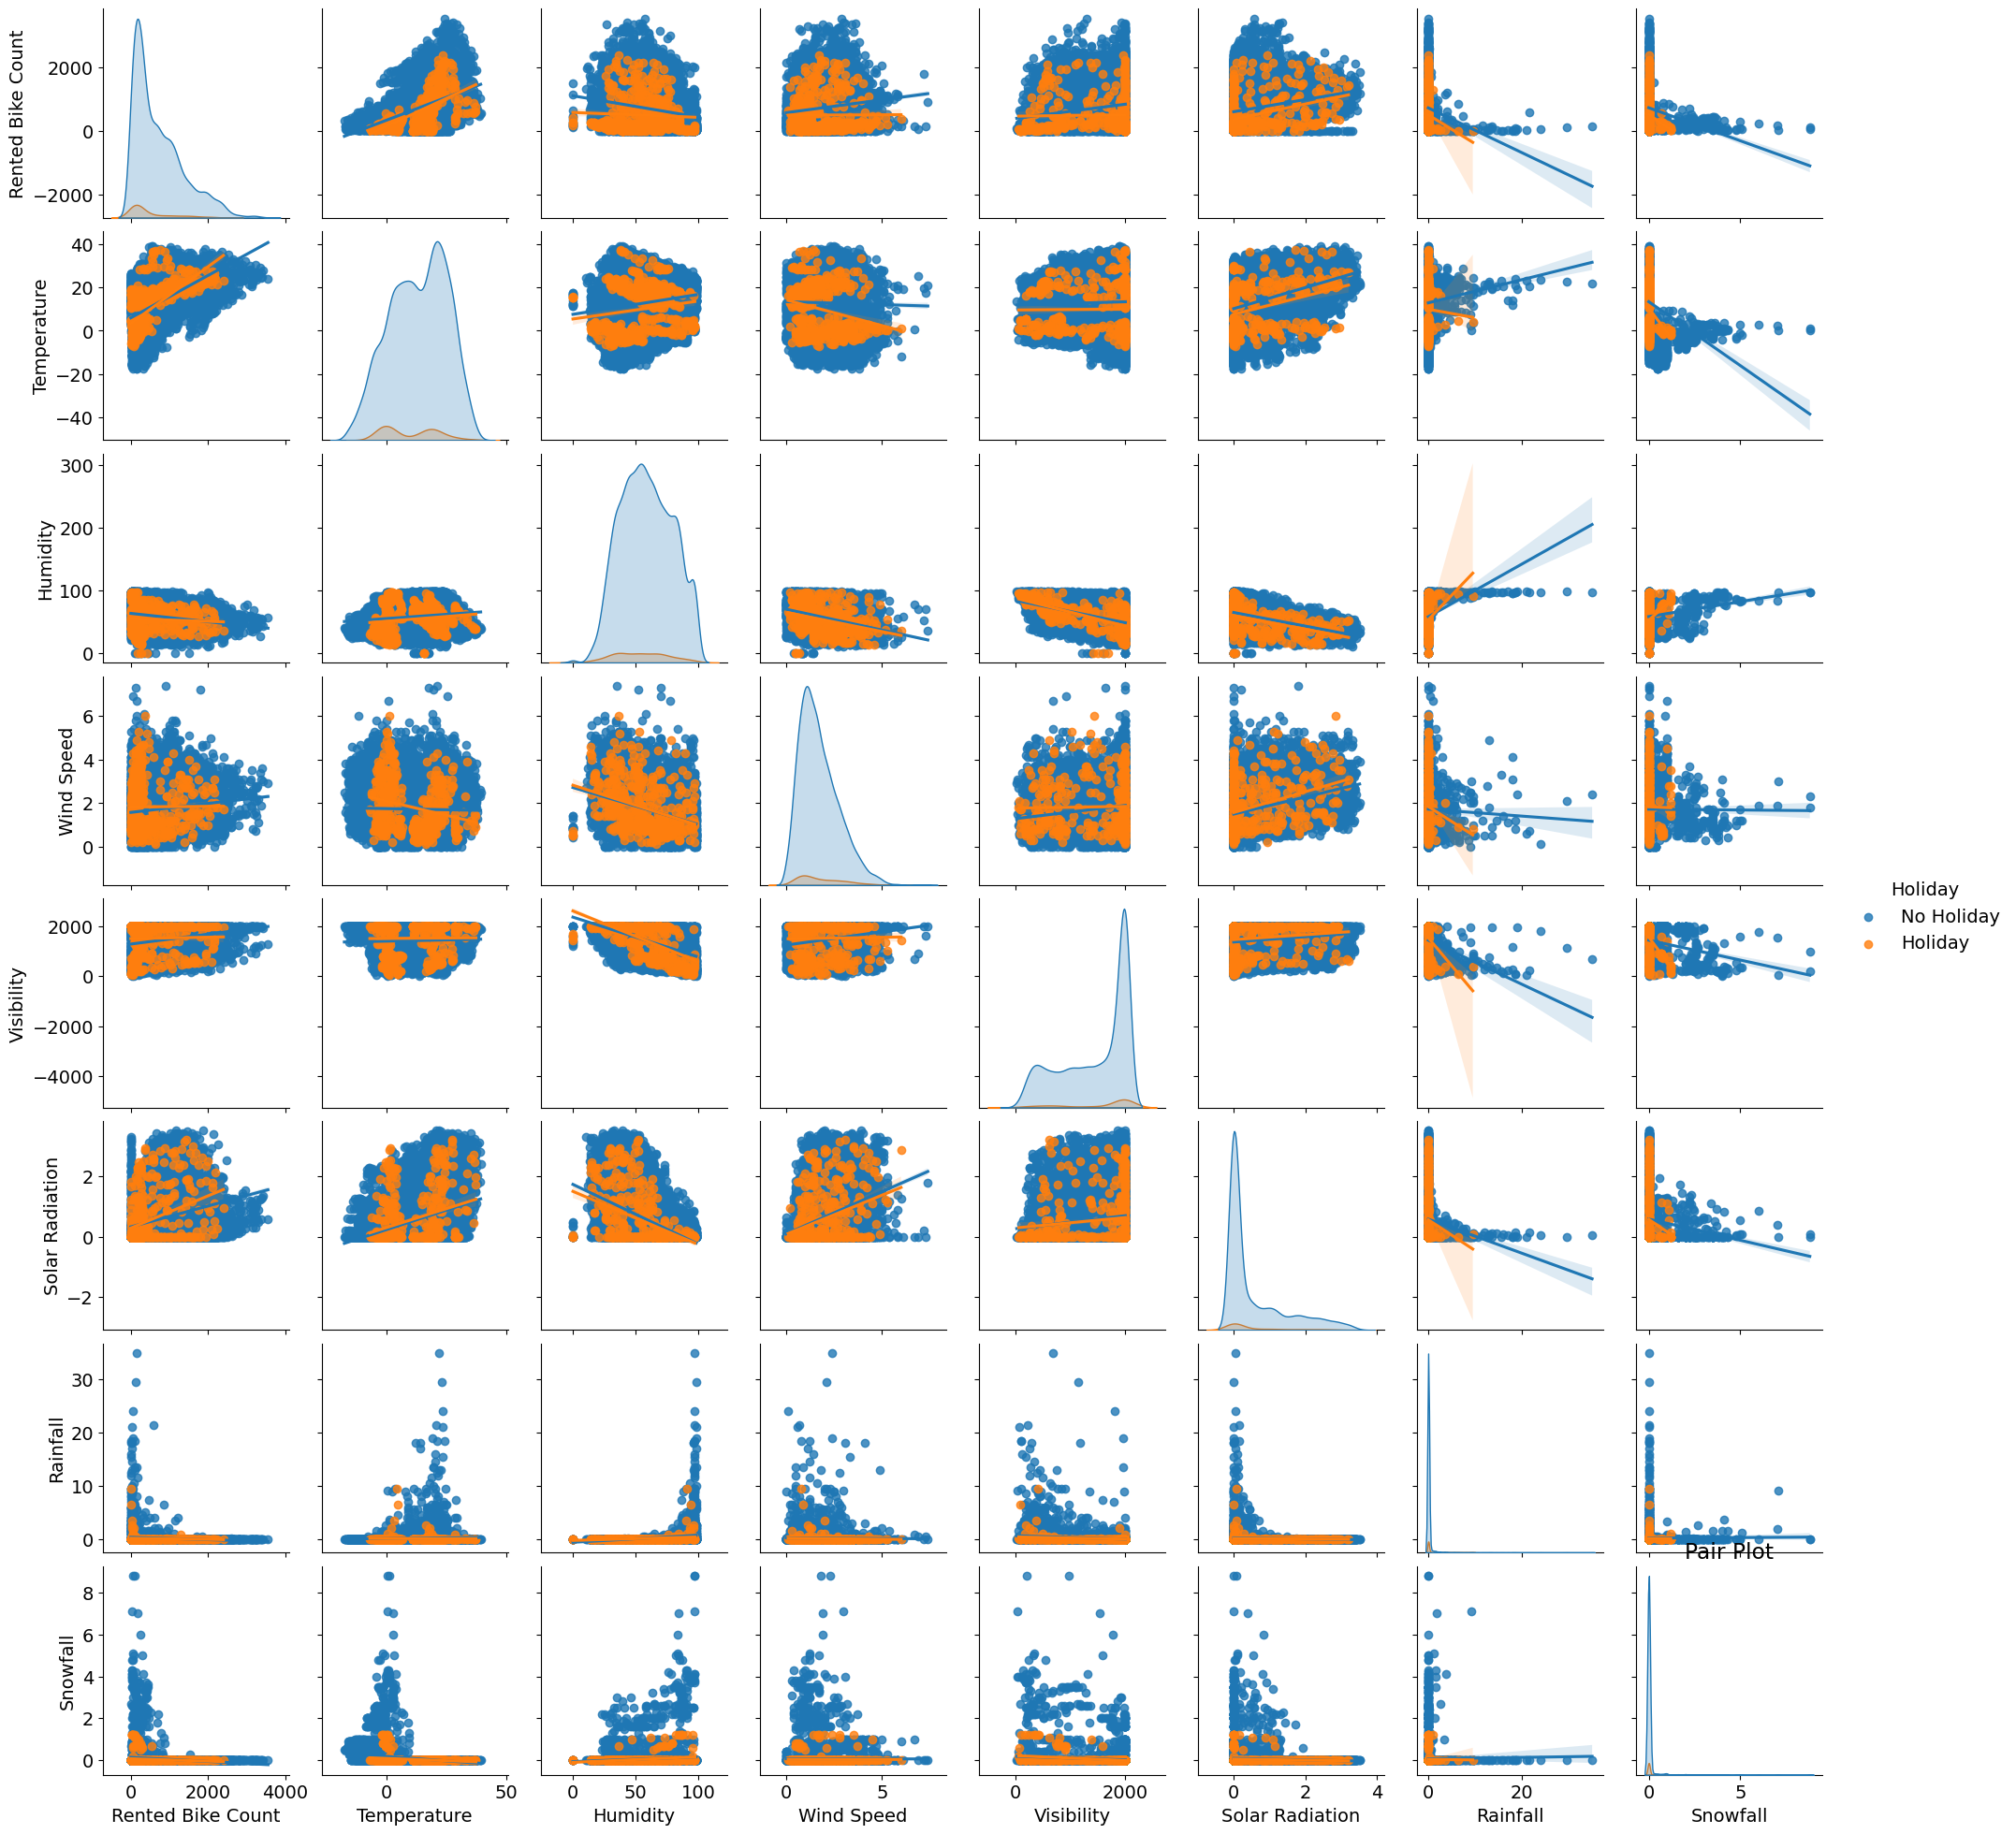

In [74]:
# Pair Plot visualization code
selected_colums =['Rented Bike Count','Temperature', 'Humidity','Wind Speed', 'Visibility', 'Solar Radiation', 'Rainfall', 'Snowfall', 'Holiday']
pair_plot_df = df[selected_colums]

# # same can be implemented using the below code
# pair_plot_df = df.copy()
# pair_plot_df.drop(columns = ['Year','Functioning Day', 'Month', 'Day', 'Hour', 'Seasons'], inplace=True)

sns.pairplot(pair_plot_df, diag_kind="kde", kind = 'reg', hue = 'Holiday')

#setting labels to infer the plot
plt.title('Pair Plot')
plt.ylabel('Feature/Property')
plt.xlabel('Feature/Property')

##### 1. Why did you pick the specific chart?

Heatmaps are used to show relationships between two variables, one plotted on each axis

##### 2. What is/are the insight(s) found from the chart?

heatmap color changes with variable.so we get to know the range of the rental bike on specific conditions

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
#df['Holiday'].value_counts(normalize = True) * 100

#df['Holiday'].value_counts()
#working_day = df[df['Holiday'] == 1].sample(400, replace = False)
#non_working_day = df[df['Holiday'] == 0].sample(400, replace = False)

#round(working_day['Rented Bike Count'].std()**2,2), round(non_working_day['Rented Bike Count'].std()**2 ,2)
#Observations: The variance is not equal for both the samples.

# Calculating the p-value and test- statistics usinging ttest_ind() for this right skwed distribution sample.
# Alternative == greater as it's right skewed and one-sided

#from scipy import stats
#import statsmodels.api as sm

#t_test, p_value = stats.ttest_ind(working_day['Rented Bike Count'],non_working_day['Rented Bike Count'],
#                                  alternative='greater', equal_var = False)
#t_test, p_value

# The distribution of the population samples is right-skwed and it's not normal which violates is our assumption for conducting 2 sample t test.
# Also the varaince of the samples is unequal.Hence we will do log-transformation
# We got a p-value of 0.99 which is greater than 0.05 and hence we can say that we fail to reject null hypothesis. We will confirm after log - transformation as well

# Applying log on the data - Log Normal Distribution
#fig = plt.figure(figsize = (15,12))

#ax1 = fig.add_subplot(221)
#sns.histplot(data = np.log(working_day['Rented Bike Count']) , bins = 50, kde = True, ax = ax1, color = 'green')
#ax1.set_title('Count of bikes rented in working days')


#ax2 = fig.add_subplot(223)
#sns.histplot(data = np.log(non_working_day['Rented Bike Count']) , bins = 50, kde = True, ax = ax2, color  = 'green')
#ax2.set_title('Count of bike rented in non-working days')


#round(np.log(working_day['Rented Bike Count']).std()**2,2), round(np.log(non_working_day['Rented Bike Count']).std()**2 ,2)
#'''Observations: After taking log on the sample population, we get a near normal distribution with variance
 #similar to each other. So we can calculate the p-value and test-statistics.'''

#sample_working_log = np.log(working_day['Rented Bike Count']).sample(400)
#sample_nonworking_log = np.log(non_working_day['Rented Bike Count']).sample(400)

#statistic,p_value = stats.ttest_ind(sample_working_log,sample_nonworking_log , alternative = 'greater')
#statistic,p_value

#def htResult(p_value):
    #if p_value <= significance_level:
        #print('Reject NULL HYPOTHESIS')
    #else:
     #  print('Fail to Reject NULL HYPOTHESIS')

#htResult(p_value)
#Conclusion : As the p value > alpha(0.05) , we fail to reject H0 and thus we can say that the cnt of renting of bikes in both working and non-working days is equal.

'Observations: After taking log on the sample population, we get a near normal distribution with variance\n similar to each other. So we can calculate the p-value and test-statistics.'

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [75]:
# Handling Missing Values & Missing Value Imputation
# There were no missing values present in the database, no manipulations were done

# Missing Values/Null Values Count
missing_values = df.isna().sum()
print(missing_values)

Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind Speed               0
Visibility               0
Dew Point Temperature    0
Solar Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
Year                     0
Month                    0
Day                      0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

There were no missing values present in the database, no manipulations were done

### 2. Handling Outliers

In [76]:
df.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature', 'Humidity', 'Wind Speed',
       'Visibility', 'Dew Point Temperature', 'Solar Radiation', 'Rainfall',
       'Snowfall', 'Year', 'Month', 'Day'],
      dtype='object')

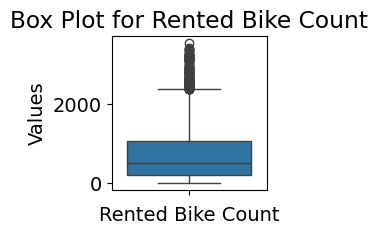

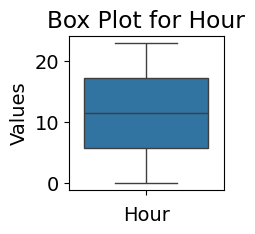

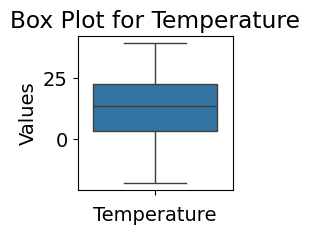

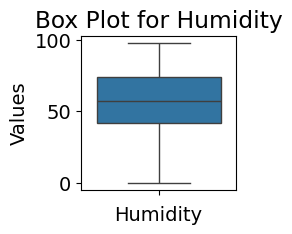

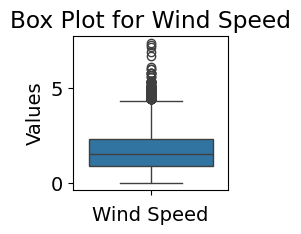

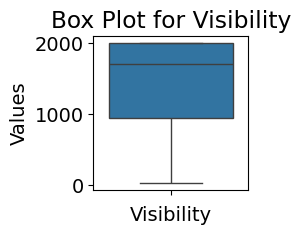

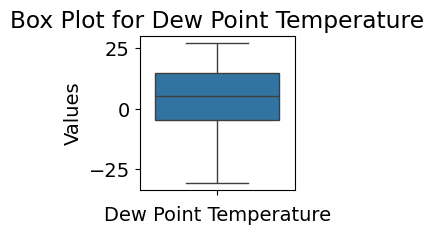

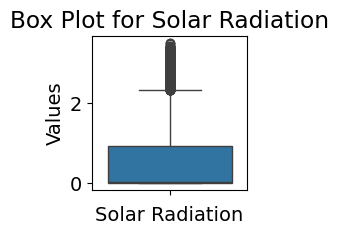

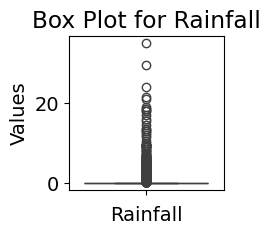

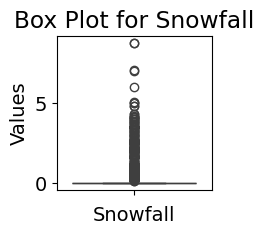

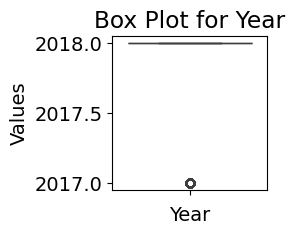

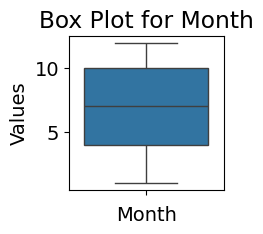

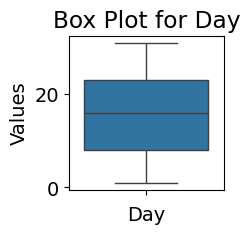

In [77]:
# Handling Outliers & Outlier treatments
numerical_vars = df.describe().columns
for var in numerical_vars:
  plt.figure(figsize=(2, 2))
  sns.boxplot(y=var, data=df)
  plt.xlabel(var)
  plt.ylabel('Values')
  plt.title(f'Box Plot for {var}')
  plt.show()

In [78]:
# Outliers are observed in the following columns
outliers_col=['Wind Speed','Solar Radiation','Rainfall','Snowfall']

#writing a function to handle outliers in the dataframe
def cliping_outliers(df1):
    for col in df1[outliers_col]:
        # using IQR method to define range of upper and lower limit.
        q1 = df1[col].quantile(0.25)
        q3 = df1[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # replacing the outliers with upper and lower bound
        df1[col] = df1[col].clip(lower_bound, upper_bound)
    return df1


# calling the function and handeling outliers
df = cliping_outliers(df)

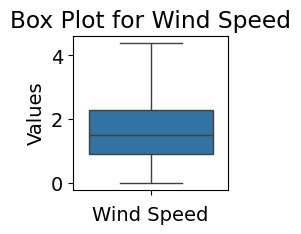

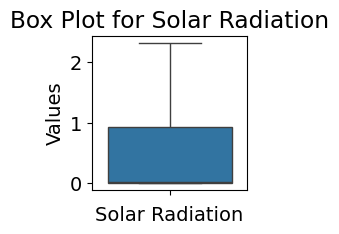

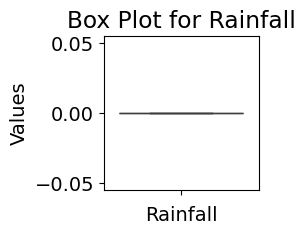

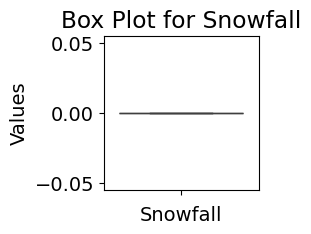

In [79]:
# after handeling Outliers & Outlier treatments

for var in outliers_col:
  plt.figure(figsize=(2, 2))
  sns.boxplot(y=var, data=df)
  plt.xlabel(var)
  plt.ylabel('Values')
  plt.title(f'Box Plot for {var}')
  plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [80]:
# Encode your categorical columns
# convert object type data to dumy variables(binary form)

df['Winter']=np.where(df["Seasons"]=='Winter',1,0)
df['Spring']=np.where(df["Seasons"]=='Spring',1,0)
df['Summer']=np.where(df["Seasons"]=='Summer',1,0)
df['Autumn']=np.where(df["Seasons"]=='Autumn',1,0)

df['Holiday']=np.where(df["Holiday"]=='Holiday',1,0)
df['Functioning Day']=np.where(df['Functioning Day']=='Yes',1,0)

# Since Seasons is encoded into 4 new features we are dropping the orignal feature
df.drop('Seasons',axis=1, inplace = True)

x=['Month','Hour']
for i in x:
      df = pd.concat([df, pd.get_dummies(df[i], prefix=i, drop_first=True)], axis=1)
      df = df.drop([i], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented Bike Count      8760 non-null   int64  
 1   Temperature            8760 non-null   float64
 2   Humidity               8760 non-null   int64  
 3   Wind Speed             8760 non-null   float64
 4   Visibility             8760 non-null   int64  
 5   Dew Point Temperature  8760 non-null   float64
 6   Solar Radiation        8760 non-null   float64
 7   Rainfall               8760 non-null   float64
 8   Snowfall               8760 non-null   float64
 9   Holiday                8760 non-null   int64  
 10  Functioning Day        8760 non-null   int64  
 11  Year                   8760 non-null   int32  
 12  Day                    8760 non-null   int32  
 13  Winter                 8760 non-null   int64  
 14  Spring                 8760 non-null   int64  
 15  Summ

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing (not applicable in our case)
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

# we did not come accross any textual data in our dataframe, No textual data preprocessings steps were done.

#### 2. Lower Casing

In [ ]:
# Lower Casing
# we have renamed the columns code comes here


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
# was not an option in our dataframe

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
# was not an option in our dataframe

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
# was not an option in our dataframe

In [ ]:
# Remove White spaces
# was not an option in our dataframe

#### 6. Rephrase Text

In [ ]:
# Rephrase Text
# was not an option in our dataframe

#### 7. Tokenization

In [ ]:
# Tokenization
# was not an option in our dataframe

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# was not an option in our dataframe

##### Which text normalization technique have you used and why?

was not an opyion in our dataframe

#### 9. Part of speech tagging

In [ ]:
# POS Taging
# was not an option in our dataframe

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
# was not an option in our dataframe

##### Which text vectorization technique have you used and why?

was not an option in our dataframe

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features


#### 2. Feature Selection

In [81]:
# Select your features wisely to avoid overfitting
df = df.drop(['Year','Day'],axis=1)


##### What all feature selection methods have you used  and why?

1. In EDA we have carried out date column manipulation, we have created 3 new features using the date feature, where we extracted date, month and year
2. We have dropped dew drops features as we saw it coliner with temperature
3. Day and month are less colineraly related with rented bike count ie 0.4 and 0.7 respectively, so we droped them

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [82]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented Bike Count      8760 non-null   int64  
 1   Temperature            8760 non-null   float64
 2   Humidity               8760 non-null   int64  
 3   Wind Speed             8760 non-null   float64
 4   Visibility             8760 non-null   int64  
 5   Dew Point Temperature  8760 non-null   float64
 6   Solar Radiation        8760 non-null   float64
 7   Rainfall               8760 non-null   float64
 8   Snowfall               8760 non-null   float64
 9   Holiday                8760 non-null   int64  
 10  Functioning Day        8760 non-null   int64  
 11  Winter                 8760 non-null   int64  
 12  Spring                 8760 non-null   int64  
 13  Summer                 8760 non-null   int64  
 14  Autumn                 8760 non-null   int64  
 15  Mont

In [83]:
# Split your data to train and test. Choose Splitting ratio wisely.
x = df.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(df['Rented Bike Count'])
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state=4)

In [88]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7008, 48) (7008,)
(1752, 48) (1752,)


##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset (Not applicable in our case)

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [85]:
# initiating test and train dictionary for future reference and comparing values
train={}
test={}

def modelfit(model, X_train, X_test, y_train, y_test, output_name) :
  model.fit(X_train, y_train)
  score = model.score(X_train, y_train)
  print(f'The score for {output_name} is: {score}')

  y_pred_train=model.predict(X_train)
  y_pred_test=model.predict(X_test)

  print('_'*50)
  print(f'metrics for {output_name} train data set')
  print('_'*50)

  # calculating and printing mean squred error
  MSE = mean_squared_error((y_train), (y_pred_train))
  print(f'MSE : {MSE}')

  mae = mean_absolute_error((y_train), (y_pred_train))
  print(f'Mean absolute Error : {mae}')

  # calculating and printing root mean square error(RMSE)
  RMSE = np.sqrt(MSE)
  print(f'RMSE : {RMSE}')

  # calculating and printing r^2 score
  r2= r2_score(y_train, y_pred_train)
  print(f'R2 : {r2}')

  # calculating and printing Adjusted r^2
  # Formula => Adjusted R-squared = 1 - [(1 - R-squared) * (n - 1) / (n - p - 1)]
  a_r2 = 1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print(f'Adjusted R^2: {a_r2}')

  # updating the observed values to train dictionary, for future refrences
  train[output_name]=MSE, mae, RMSE, r2, a_r2

  print('_'*50)
  print(f'metrics for {output_name} test data set')
  print('_'*50)

  # calculating and printing mean squred error
  MSE = mean_squared_error((y_test), (y_pred_test))
  print(f'MSE : {MSE}')

  mae = mean_absolute_error((y_test), (y_pred_test))
  print(f'Mean absolute Error : {mae}')

  # calculating and printing root mean square error(RMSE)
  RMSE = np.sqrt(MSE)
  print(f'RMSE : {RMSE}')

  # calculating and printing r^2 score
  r2= r2_score(y_test, y_pred_test)
  print(f'R2 : {r2}')

  # calculating and printing Adjusted r^2
  a_r2 = 1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print(f'Adjusted R^2: {a_r2}')

  # updating the observed values to test dictionary, for future refrences
  test[output_name]=MSE, mae, RMSE, r2, a_r2
  print('\n \n \n')

  # plotting the actual vs. predicted values
  plt.figure(figsize=(10,5))
  plt.title(f'Actual vs. Predicted for {output_name}')
  plt.plot(np.array(y_pred_test))
  plt.plot(np.array((y_test)))
  plt.legend(["Predicted","Actual"])
  plt.show()

### ML Model - 1
# Linear Regression

The score for Linear Regression is: 0.761727670853743
__________________________________________________
metrics for Linear Regression train data set
__________________________________________________
MSE : 36.772395384161335
Mean absolute Error : 4.561828734486844
RMSE : 6.064024685319259
R2 : 0.761727670853743
Adjusted R^2: 0.7550118330386988
__________________________________________________
metrics for Linear Regression test data set
__________________________________________________
MSE : 39.57590082895821
Mean absolute Error : 4.707503989648194
RMSE : 6.290937992776452
R2 : 0.749050217544386
Adjusted R^2: 0.7419770586730593

 
 



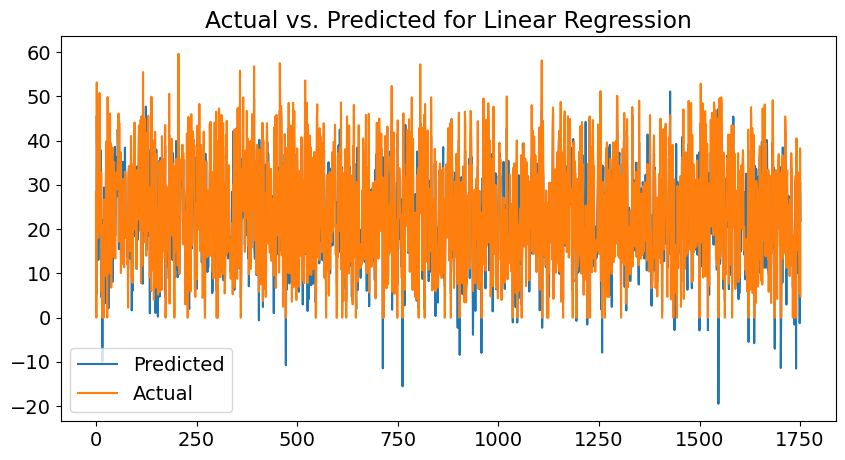

In [86]:
# ML Model - 1 Implementation
LiReg = LinearRegression()
modelfit(LiReg, X_train, X_test, y_train, y_test, 'Linear Regression')

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2
# Lasso

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [98]:
# Visualizing evaluation Metric Score chart
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso,parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)
print(f'The best fit alpha value is found out to be : {lasso_regressor.best_params_}')
print(f'Using {lasso_regressor.best_params_} the negative mean squared error is: {lasso_regressor.best_score_}')


The best fit alpha value is found out to be : {'alpha': 0.0001}
Using {'alpha': 0.0001} the negative mean squared error is: -37.276529940285606


#### 2. Cross- Validation & Hyperparameter Tuning

The score for Lasso is: 0.7617177907360825
__________________________________________________
metrics for Lasso train data set
__________________________________________________
MSE : 36.773920175539175
Mean absolute Error : 4.561061812002151
RMSE : 6.064150408386914
R2 : 0.7617177907360825
Adjusted R^2: 0.7550016744444394
__________________________________________________
metrics for Lasso test data set
__________________________________________________
MSE : 39.6052790525496
Mean absolute Error : 4.7082328486304705
RMSE : 6.293272523302133
R2 : 0.7488639309744087
Adjusted R^2: 0.7417855215127361

 
 



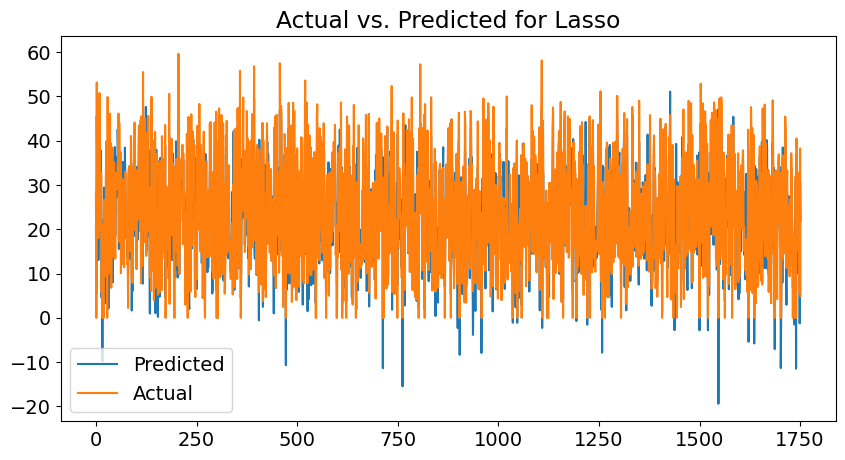

In [90]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso=Lasso(alpha=0.001,max_iter=3000)
modelfit(lasso, X_train, X_test, y_train, y_test, 'Lasso')

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3
#Ridge

In [91]:
# ML Model - 3 Implementation
ridge=Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -37.32746038283892


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The score for Ridge is: 0.7617207381623943
__________________________________________________
metrics for Ridge train data set
__________________________________________________
MSE : 36.77346530137863
Mean absolute Error : 4.562241834459033
RMSE : 6.0641129030863725
R2 : 0.7617207381623943
Adjusted R^2: 0.7550047049455973
__________________________________________________
metrics for Ridge test data set
__________________________________________________
MSE : 39.60587189115426
Mean absolute Error : 4.709698247000616
RMSE : 6.293319624105727
R2 : 0.7488601717998667
Adjusted R^2: 0.7417816563837737

 
 



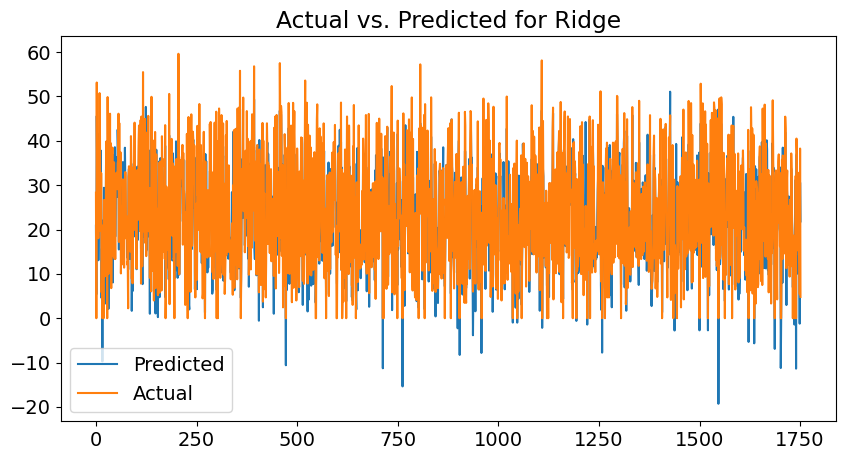

In [92]:
# Visualizing evaluation Metric Score chart
ridge= Ridge(alpha=1)
modelfit(ridge, X_train, X_test, y_train, y_test, 'Ridge')

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model 4
#ElasticNet

The score for ElasticNet is: 0.7616259848774785
__________________________________________________
metrics for ElasticNet train data set
__________________________________________________
MSE : 36.788088506974326
Mean absolute Error : 4.563999499185055
RMSE : 6.065318500043862
R2 : 0.7616259848774785
Adjusted R^2: 0.7549072809867673
__________________________________________________
metrics for ElasticNet test data set
__________________________________________________
MSE : 39.70149218556224
Mean absolute Error : 4.715919512763478
RMSE : 6.300912012206029
R2 : 0.7482538459405077
Adjusted R^2: 0.7411582408936166

 
 



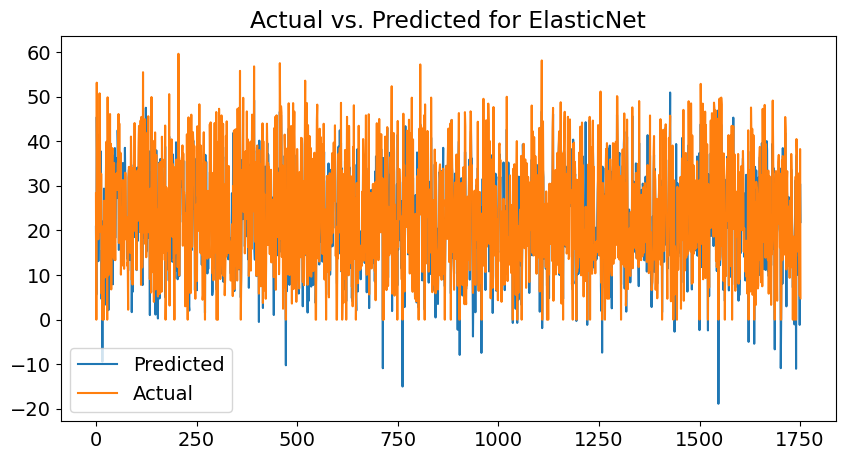

In [93]:
elasticnet = ElasticNet(alpha=0.001, l1_ratio=0.5)

modelfit(elasticnet, X_train, X_test, y_train, y_test, 'ElasticNet')

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

### ML Model 5
# Random Forest

The score for Random Forest is: 0.9828104372208611
__________________________________________________
metrics for Random Forest train data set
__________________________________________________
MSE : 2.6528527305718295
Mean absolute Error : 1.061022171306354
RMSE : 1.6287580331564997
R2 : 0.9828104372208611
Adjusted R^2: 0.9823259398553892
__________________________________________________
metrics for Random Forest test data set
__________________________________________________
MSE : 21.11408152614093
Mean absolute Error : 2.94146598167055
RMSE : 4.595006150827323
R2 : 0.8661161450592143
Adjusted R^2: 0.8623425543151405

 
 



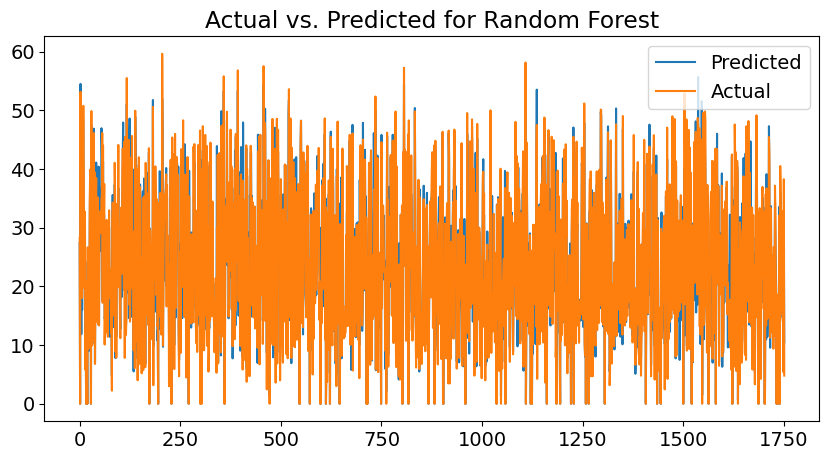

In [94]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()
modelfit(rf_model, X_train, X_test, y_train, y_test, 'Random Forest')


### ML model 6
# Support Vector Regressor

The score for Support Vector Regressor is: 0.10740603810781058
__________________________________________________
metrics for Support Vector Regressor train data set
__________________________________________________
MSE : 137.75337741407333
Mean absolute Error : 9.665498856169012
RMSE : 11.736838476100509
R2 : 0.10740603810781058
Adjusted R^2: 0.08224778198871174
__________________________________________________
metrics for Support Vector Regressor test data set
__________________________________________________
MSE : 140.80206825862274
Mean absolute Error : 9.769557028017063
RMSE : 11.86600473026295
R2 : 0.10717765966940818
Adjusted R^2: 0.08201296657729507

 
 



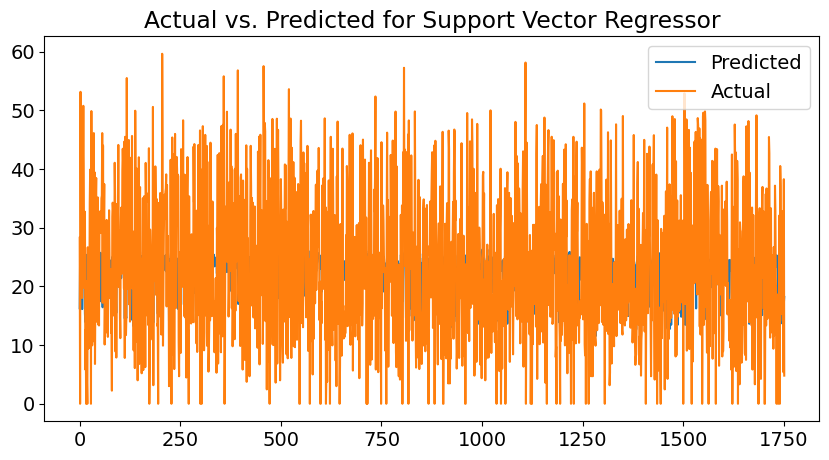

In [95]:
from sklearn.svm import SVR
support_vector = SVR(kernel = 'rbf')
modelfit(support_vector, X_train, X_test, y_train, y_test, 'Support Vector Regressor')

### ML model 7
# Decision Tree Regressor

The score for Decision Tree Regressor is: 1.0
__________________________________________________
metrics for Decision Tree Regressor train data set
__________________________________________________
MSE : 0.0
Mean absolute Error : 0.0
RMSE : 0.0
R2 : 1.0
Adjusted R^2: 1.0
__________________________________________________
metrics for Decision Tree Regressor test data set
__________________________________________________
MSE : 38.244863976405234
Mean absolute Error : 3.8088155237917602
RMSE : 6.184243201589442
R2 : 0.7574902884358151
Adjusted R^2: 0.7506550176459849

 
 



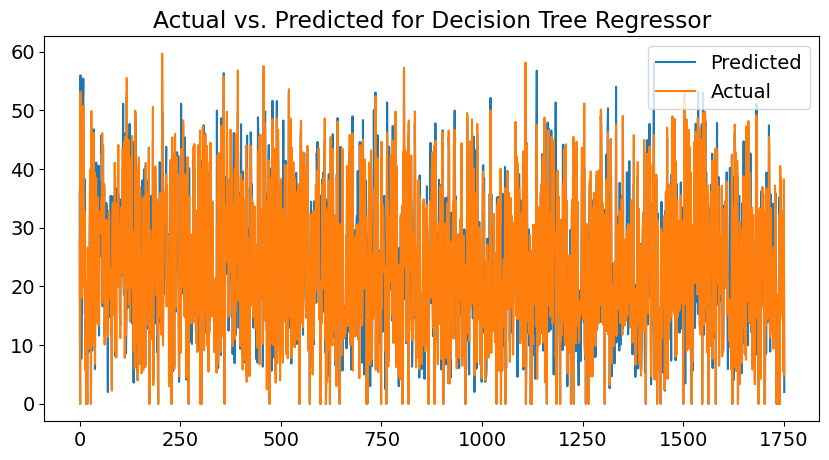

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
modelfit(dtr, X_train, X_test, y_train, y_test, 'Decision Tree Regressor')

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In [96]:
Test=pd.DataFrame(test,index=["Test MSE", 'Test MAE', "Test RMSE",'Test R^2','Test Adjusted R^2'])
Train=pd.DataFrame(train,index=["Train MSE", 'Train MAE', "Train RMSE",'Train R^2','Train Adjusted R^2'])

In [97]:
Test.transpose()

Test MSE  Test MAE  Test RMSE  Test R^2  \
Linear Regression          39.575901  4.707504   6.290938  0.749050   
Lasso                      39.605279  4.708233   6.293273  0.748864   
Ridge                      39.605872  4.709698   6.293320  0.748860   
ElasticNet                 39.701492  4.715920   6.300912  0.748254   
Random Forest              21.114082  2.941466   4.595006  0.866116   
Support Vector Regressor  140.802068  9.769557  11.866005  0.107178   

                          Test Adjusted R^2  
Linear Regression                  0.741977  
Lasso                              0.741786  
Ridge                              0.741782  
ElasticNet                         0.741158  
Random Forest                      0.862343  
Support Vector Regressor           0.082013

In [ ]:
Train.transpose()

Train MSE  Train MAE  Train RMSE  Train R^2  \
Linear Regression          36.772395   4.561829    6.064025   0.761728   
Lasso                      36.773920   4.561062    6.064150   0.761718   
Ridge                      36.773465   4.562242    6.064113   0.761721   
ElasticNet                 36.788089   4.563999    6.065319   0.761626   
Random Forest               2.581289   1.055899    1.606639   0.983274   
Support Vector Regressor  137.753377   9.665499   11.736838   0.107406   
Decision Tree Regressor     0.000000   0.000000    0.000000   1.000000   

                          Train Adjusted R^2  
Linear Regression                   0.755012  
Lasso                               0.755002  
Ridge                               0.755005  
ElasticNet                          0.754907  
Random Forest                       0.982803  
Support Vector Regressor            0.082248  
Decision Tree Regressor             1.000000

### ***Considering adjusted r^2 score on test stastics we have selected Random Forest as best performing model with accuracy of 91.37%***

### **Observations on EDA**
It is observed that 95% of days are working (not holiday) and 4.9% of days are holidays in the data given.

96.6 % of values are recorded as functioning day where are the remaining are non-functioning day

The data recorded in various season are almost equal (near to 25%)

The data has records of year 2017 and 2018 where most of the data belongs to 2018(91.5%) whereas for 2017 its 8.5%.

It is understood that mostly the days are functional or not holiday.

The data is captured for all the season, analysis can be more strong as data for all seasons is captured including functioning day and holidays.

The captured data falls under the range start date = 2017-01-12 and last date = 2018-12-11

The sum of Bikes rented on No Holiday is 5956419 and on Holiday is 215895

The sum of bikes rented on Functioning Day is 6172314 and on a non-functioning day is 0

The total bikes rented in 2018 is 5986984 and in 2017 is 185330

It is observed that on a functioning day the bike rented sum is zero, means that on a non functioning day there were no bikes that were rented. the impact of non functioning day has lead to not running the business.

During winters the bikes are rented less in numbers which means winters affect the business negativly where as during summer the impact is good and more number of bikes were rented

It is observed that the first 11 months the compay had less rented bikes while the bike rentals started to spike from december 2017, though it was not that great however the growth seems to look significant.

It is observed that the bikes are rented maximum at 8 hours(8am) and 18 hours(6pm) usually, the demand of bikes is mostly depended on the hour of the day, This can be an indication that people are renting bikes to travel to office and coming back from office.

Bike rented during non functional day is Zero

Bikes demand is more during Summer and less during the winters

It was observed that the bike rent was more when the rainfall was 0.0, however when we excluded rainfall values of 0.0, we observed that most of the bikes that were rented were during less values of rainfall.

People prefer to drive bike when the wind speed is moderate between 0.3 to 3.4. there is a minor impact of wind speed on the bike renting preference

It is observed that initial weeks are slow in growth where as after 50th week the sales increased

there is positive growth from second week and it is observed that on 25th week of the 2nd year saw max bikes rented

When visibility is 2000 people prefer the most to rent bikes
Demand of rental bikes is on the low soalar radiation i.e 0.0

People do not prefer to rent a bike when there is a solar radiation > 0.05

###Behaviour of people at various weather conditions
1. when the wind speed is between 0.3 to 4 people prefer to rent bike.
2. when the visibility is high(2000) people tend to rent bike more
3. when dew point temperature is -0.25 to 25 people tend to rent bike more.
4. when the soloar radiation is less(0.0), people tend to rent bike.
5. when the Rainfall is less(0.2), people tend to rent bike
6. when the snowfall is less(0.1), people tend to rent bike

###Various weather conditions:
1.	It is found that the temperature is normally distributed(-20 to 40)
2.	Humidity is normaly distributed 0 to 90
3.	wind speed is right skwed (0 - 7)
4.	Visisbility is left skwed (0 - 2000)
5.	dew point temperature is -30 t0 30
6.	solar radiation is highly right skewed(0 - 3.5)
7.	Rainfall is highly right skewed(0 -35)
8.	Snowfall is highly right skewed(0-8)


###Effect of various parameters on renting bikes
1.	The increase in temperature(X) from -10 to 30 the demand of rental bikes increases(Y)
2.	For the increse in humidity (X) the demand of renatl bikes decreases (Y)
3.	For the increase in wind speed(X) from 0 to 3 the demand of rental bikes increases(Y)
4.	The best line for visibilty(X) is not showing any increase of rental bike(Y)
5.	The best fit line for the Dew point temperature is increasing (X) with respect to increase in rental bikes(X)
6.	The best fit line for solar radiation (X) normally increasing with repect to rental bikes
7.	The best fit line for the snowfall and rainfall is decresing with respect to rental bikes

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***